# Analysis of changing trends in wine quality considerations

## Objective:

To determine if there is a significant change in trends of wine quality determination given wine characteristics, ie will models created from older data sets reflect the more modern quality associations. 

## Scope:
### Background
Machine learning algorithms have revolutionized the wine industry by offering winemakers a powerful tool for predicting wine quality. By analyzing various input variables, these algorithms can accurately forecast wine quality and provide valuable insights for improving production processes. The wine quality datasets contain the wine features with the "quality" and the type of wines(red or white) for vinho verde style wines from the north of Portugal. So, the data can be used for the prediction of Wine Quality as well as the detection of the type of wines from ingredient analysis.The original classic dataset from the UCI archives was donated in 2009. Are the machine learning models and algorithms trained on this dataset still going to hold relevance now, in 2024? In other fields, what is deemed to be of a high or low quality may not be consistent over time. Think of fashion, music, or language trends, or even how we drink coffee; what was "great" 15 years ago may not be so "great" now.

### What is the problem?
 The "Wine Quality" variable that is used as a classification outcome (or sometimes as a predictor variable) is subjective and, as such, could be subject to change. Can a relevant change be shown between these datasets.

### Who does this affect?
Although this data may appear to be very specific toward growers and wine producers of vinho verde style wines in Portugal's north, algorithms and insights developed from this data can be used in the wine industry globally. It also affects how the data science community approaches problems such as this and determines things such as how frequently should algorithms be reconstructed based on updated data; can existing models just train on the new dataset or does the methodology need to change? It also impacts businesses involved in cellaring wines; if you are aware of how your wine will change with age but know that there is a downward trend in the quality based on a certain feature, you may want to shorten or extend your cellaring to optimise that feature for the high quality market.

### What value does solving this problem have?
If clear changes are observable in feature profiles for each quality level, then we know that models and conclusions drawn from analyses will have a "shelf life" and potentially more investment in data collection in the wine industry is required to minimise losses due to outdated associations between quality and wine component features. Even if there are not statistically significant changes observable between these two datasets, there may be an indication that more specificity in creating the data tables is required. For example including specific variety of wine grape or grape blend and specific wine style such as "dessert", "moscato", "sparkling" etc. Or that a comprehensive longitudinal study is required. 

## Data sets
### Source
Two data sets are compared; the original UCI dataset in the form of two csv files; 'winequality-white.csv' https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv, and 'winequality-red.csv' from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv  and a newer dataset available from Kaggle https://www.kaggle.com/datasets/subhajournal/wine-quality-data-combined, that claims to also be from UCI but has a source date of 2023. Further information regarding the initial dataset cane be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names or here: https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c

In [1]:
#import packages
import pandas as pd #dataframes
import numpy as np #arrays
import scipy.stats as stats #statistics
import seaborn as sns #KDE plots
import matplotlib.pyplot as plt #plotting
import warnings #to remove warning scripts
%matplotlib inline

#### Load and investigate the old data

In [2]:
# Load the 2009 csv's:
old_red = pd.read_csv('winequality-red.csv')
old_white = pd.read_csv('winequality-white.csv')
old_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [3]:
# Format is wrong, reload the 2009 csv's using the appropriate sep argument
old_red = pd.read_csv('winequality-red.csv', sep=';')
old_white = pd.read_csv('winequality-white.csv', sep=';')
old_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Now with usable dataframes, compare shapes
old_red.shape

(1599, 12)

In [5]:
old_white.shape

(4898, 12)

In [6]:
print(f"Can see that {round(100*old_red.shape[0]/(old_red.shape[0]+old_white.shape[0]),2)}% of the 2009 data is red")

Can see that 24.61% of the 2009 data is red


##### Column overview

In [7]:
# Get an overview of the column data
old_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
old_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


##### Data types

In [9]:
#Check the 2009 red column datatypes
old_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
#Confirm the 2009 white column data types are the same
(old_white.dtypes==old_red.dtypes).all()

True

##### Na Values

In [11]:
print(f"The number of Na values in old_red is {old_red.isna().sum().sum()}.")

The number of Na values in old_red is 0.


In [12]:
print(f"The number of Na values in old_white is {old_white.isna().sum().sum()}.")

The number of Na values in old_white is 0.


Both the CSVs have the same format of 11 float columns of features and a final column of integer values for quality. There are 1599 red and 4898 white observations. The red wine qualities range from 3 to 8, whilst the white wines qualities range from 3 to 9. There are also no NA values so no need for imputation or observation deletion.

#### Load and investigate the new (2023) data:

In [13]:
#Load the 2023 dataset:
combined = pd.read_csv('WineQuality.csv')

In [14]:
combined.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [15]:
combined.shape

(32485, 14)

The new dataset has two extra columns; Unnamed, which is a unique observation index, and Type, which categorises whether the observation is for 'White Wine' or 'Red Wine'. Separate the dataframe grouping by 'Type' and discard the extra columns:

In [16]:
# Split the dataframe into red and white components removing the 1st and last columns:
new_white = combined[combined.Type == 'White Wine'].iloc[:, 1:-1]

In [17]:
new_red = combined[combined.Type == 'Red Wine'].iloc[:, 1:-1]

In [18]:
#Check the shapes of split data and confirm no losses:
print(new_white.shape,new_red.shape)
(new_white.shape[0]+new_red.shape[0])==(combined.shape[0])

(24453, 12) (8032, 12)


True

In [19]:
print(f"Can see that {round(100*new_red.shape[0]/(new_red.shape[0]+new_white.shape[0]),2)}% of the 2023 data is red")

Can see that 24.73% of the 2023 data is red


##### Column overview

In [20]:
# Get an overview of the column data
new_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000
mean,8.327527,0.531579,0.269946,2.493196,0.087445,15.874751,46.407495,0.996762,3.310486,0.658406,10.416046,5.631225
std,1.777471,0.176490,0.195626,1.280007,0.046058,10.446807,32.447522,0.001915,0.156151,0.169940,1.070278,0.806190
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,0.071000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.080000,13.000000,38.000000,0.996800,3.310000,0.620000,10.100000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.091000,22.000000,62.000000,0.997860,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
new_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,24453.000000,24453.000000,24453.000000,24453.000000,24453.000000,24453.000000,24453.000000,24453.000000,24453.000000,24453.000000,24453.000000,24453.000000
mean,6.849221,0.277234,0.334215,6.406196,0.045683,35.248456,138.402241,0.994048,3.189068,0.489815,10.501928,5.870977
std,0.834003,0.099514,0.119998,5.125832,0.021295,16.829606,42.377620,0.003009,0.151561,0.113430,1.226908,0.885197
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991760,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


##### Format consistency

In [22]:
# Check consistency across data types
((new_white.dtypes==old_red.dtypes) & (old_red.dtypes==new_red.dtypes) & (new_red.dtypes==old_white.dtypes)).all()

True

In [23]:
# Check consistency across column names
((new_white.columns==old_red.columns) & (old_red.columns==new_red.columns) & (new_red.columns==old_white.columns)).all()

True

##### Na values

In [24]:
# Check for Na Values
print(f"The number of Na values in new_red is {new_red.isna().sum().sum()}.")

The number of Na values in new_red is 0.


In [25]:
print(f"The number of Na values in new_white is {new_red.isna().sum().sum()}.")

The number of Na values in new_white is 0.


The data types and column names are consistent across all the dataframes and no NA values are present. The new dataset has 24453 white wine observations and 8032 red wine observations. The ratio of red to white dataset observations appears relatively consistent (~25% red).

####  Confirm that the original data is not actually a subset of the new data:

In [26]:
# Rows in old_red:
old_red.shape[0]

1599

In [27]:
# Unique rows in old_red:
old_red.drop_duplicates().shape[0]

1359

In [28]:
# Rows in new_red:
new_red.shape[0]

8032

In [29]:
# Unique rows in new_red:
new_red.drop_duplicates().shape[0]

1349

In [30]:
# Unique rows when new and old red datasets combined:
pd.concat([new_red, old_red], ignore_index=True).drop_duplicates().shape[0]

1458

As there are more unique rows when the two datasets are combined than either dataframe on it's own, then the unique rows of either are not completely contained within the other. This confirms that they are two separate data sets and that the 2023 dataset is not just an appended version of the 2009 dataset.

## Exploratory Data Analysis


In [31]:
#Create function for comparison plots:
def wineplot(df1,df2,col,bigtitle,measure,wine):
    # create list of colours for each quality level:
    cols = ['blue','green','red','orange','black','grey','purple']
    # find number of quality values
    num = pd.concat([df1['quality'], df2['quality']]).nunique()
    #remove warnings:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        # Create subplots
        fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

        # Plot KDE plots for df1
        for i in range(num):
            sns.kdeplot(df1[col][df1.quality==(i+3)], ax=axes[0], label=str('Old '+wine), color=cols[i], linestyle='-',cut=0)

        # Plot KDE plots for df2
        for i in range(num):
            sns.kdeplot(df2[col][df2.quality==(i+3)], ax=axes[1], label=str('New '+wine), color=cols[i], linestyle='-',cut=0)

        # Set titles for subplots
        axes[0].set_title(str('Old '+wine))
        axes[1].set_title(str('New '+wine))

        # Set common labels
        fig.text(0.5, 0.04, measure, ha='center')

        # Manually create a shared legend
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, [str(i) for i in range(3, num+3)], title='Quality', loc='center')

        plt.suptitle(bigtitle, y=1.05)
        plt.tight_layout()
        plt.show()


In [32]:
 #Create function to show overlap of distributions
def comparison(df1,df2,col,bigtitle,measure,wine):
        # find number of quality values
        num = pd.concat([df1['quality'], df2['quality']]).nunique()
        #remove warnings:
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            # Create subplots
            fig, axes = plt.subplots(1, num, figsize=(12, 4), sharey=True)
    
            # Plot KDE plots for df1
            for i in range(num):
                sns.kdeplot(df1[col][df1.quality==(i+3)], ax=axes[i], label=str('Old '+wine), shade=True, alpha=0.6, color='blue', linestyle='-', cut=0, bw_adjust=0.9)
    
            # Plot KDE plots for New red
            for i in range(num):
                sns.kdeplot(df2[col][df2.quality==(i+3)], ax=axes[i], label=str('New '+wine), shade=True, alpha=0.5, color='red', linestyle='-', cut=0, bw_adjust=0.9)

            # Set titles for subplots
            for i in range(num):
                axes[i].set_title('Quality: '+str(i+3))

            # Set common labels
            fig.text(0.5, -0.04, measure, ha='center')

            # Manually create a shared legend
            handles, labels = axes[0].get_legend_handles_labels()
            fig.legend(handles, [str('Old '+wine),str('New '+wine)], title='Quality', loc='center')

            plt.suptitle(bigtitle, y=0.95)
            plt.ylabel('Proportion')
            plt.tight_layout()
            plt.show()



### Red Wine
#### Fixed acidity (Tartaric acid)

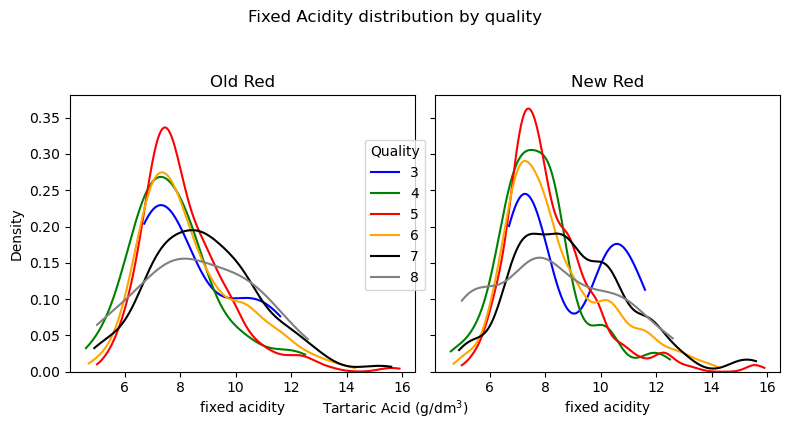

In [33]:
#Fixed Acidity side by side
wineplot(old_red,new_red,'fixed acidity','Fixed Acidity distribution by quality','Tartaric Acid (g/dm$^3$)','Red')

Whilst great for comparing shape of distributions and relative density shifts across the levels, the interest is more in relative position and overlap between datasets for each component, so will perform individual overlays

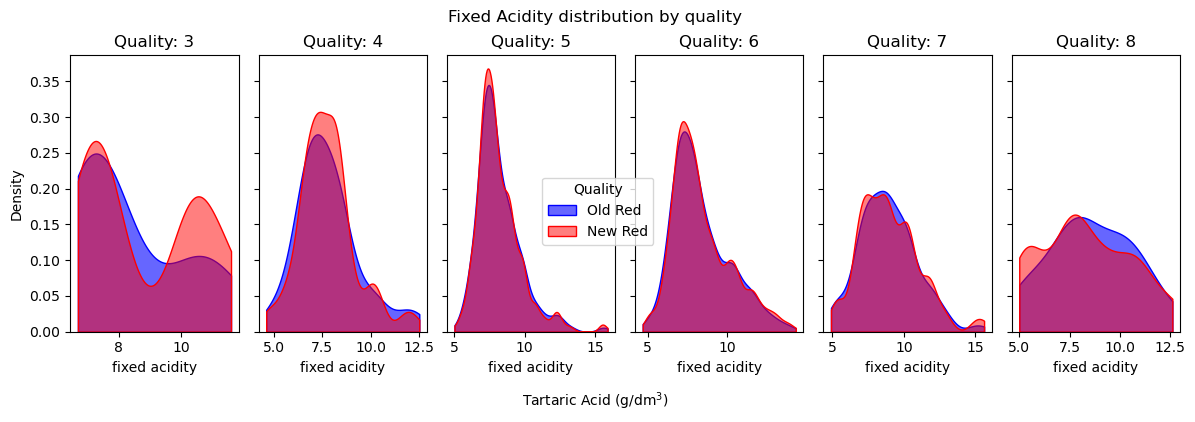

In [34]:
#Fixed Acidity overlays
comparison(old_red,new_red,'fixed acidity','Fixed Acidity distribution by quality','Tartaric Acid (g/dm$^3$)','Red')

There is alot of overlap and distinctly changing shape between levels would not be able to show significant change between old and new for individual quality levels.

#### Volatile acidity (Acetic/Ethanoic acid/vinegar)

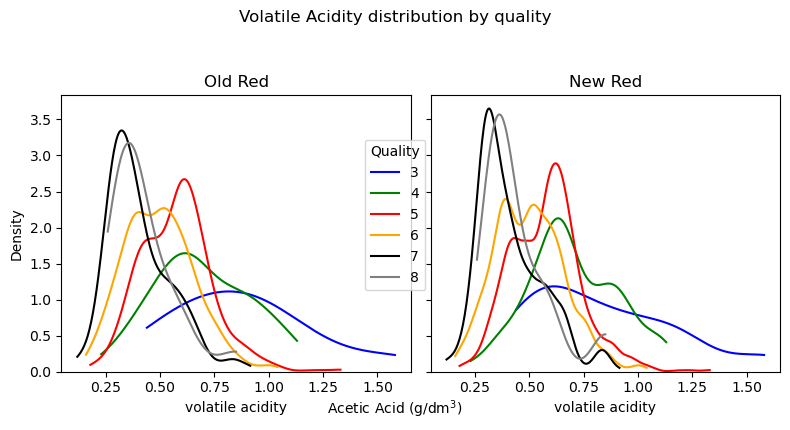

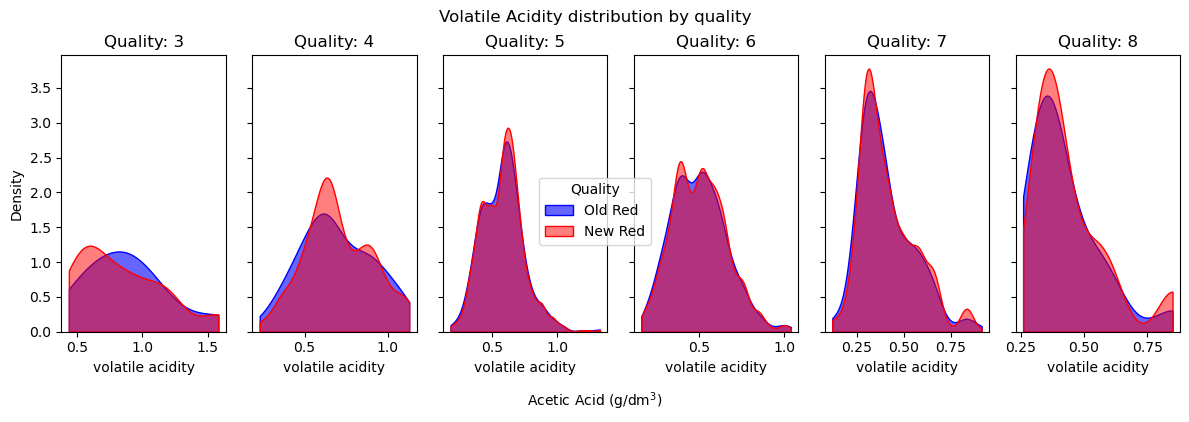

In [35]:
wineplot(old_red,new_red,'volatile acidity','Volatile Acidity distribution by quality','Acetic Acid (g/dm$^3$)','Red')
comparison(old_red,new_red,'volatile acidity','Volatile Acidity distribution by quality','Acetic Acid (g/dm$^3$)','Red')

As before, other than slight shape variations, no clear difference in comparison for individual quality levels

#### Citric acid

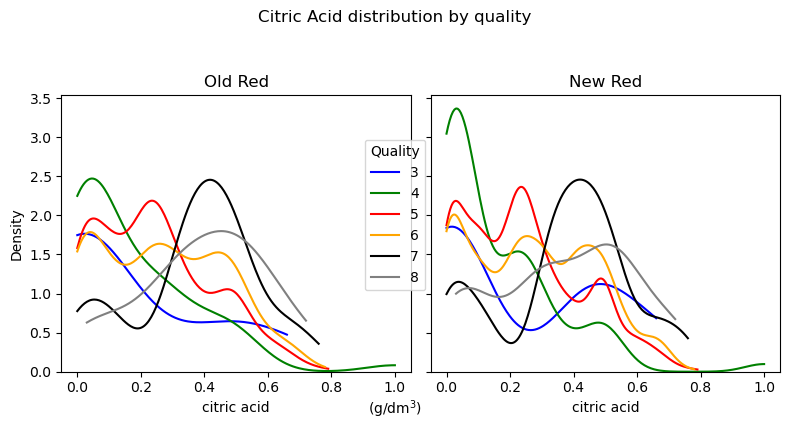

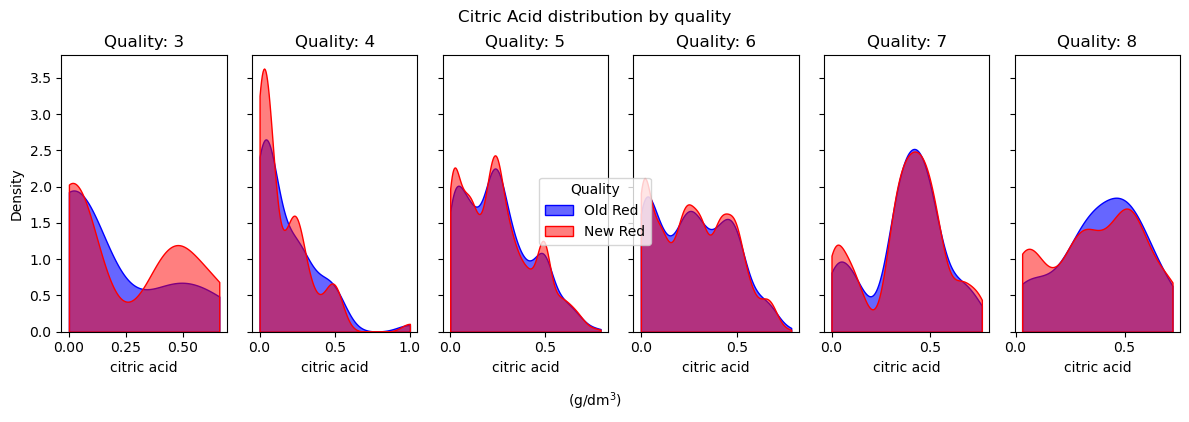

In [36]:
wineplot(old_red,new_red,'citric acid','Citric Acid distribution by quality','(g/dm$^3$)','Red')
comparison(old_red,new_red,'citric acid','Citric Acid distribution by quality','(g/dm$^3$)','Red')

Some clear shape changes but still nothing to show a clear difference in comparison for individual quality levels

#### Residual sugar

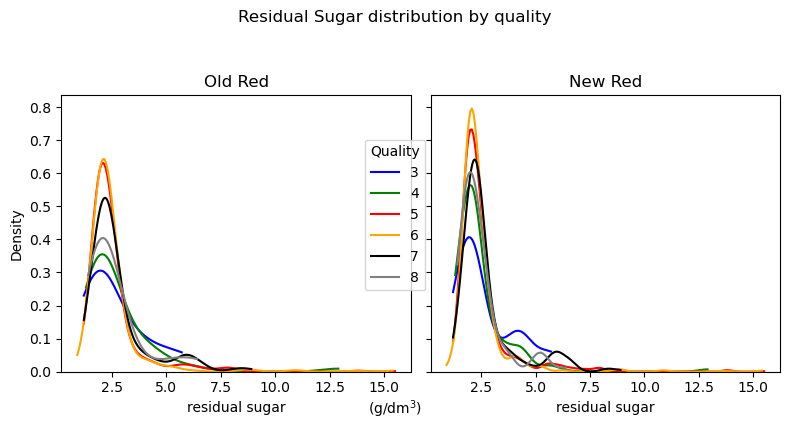

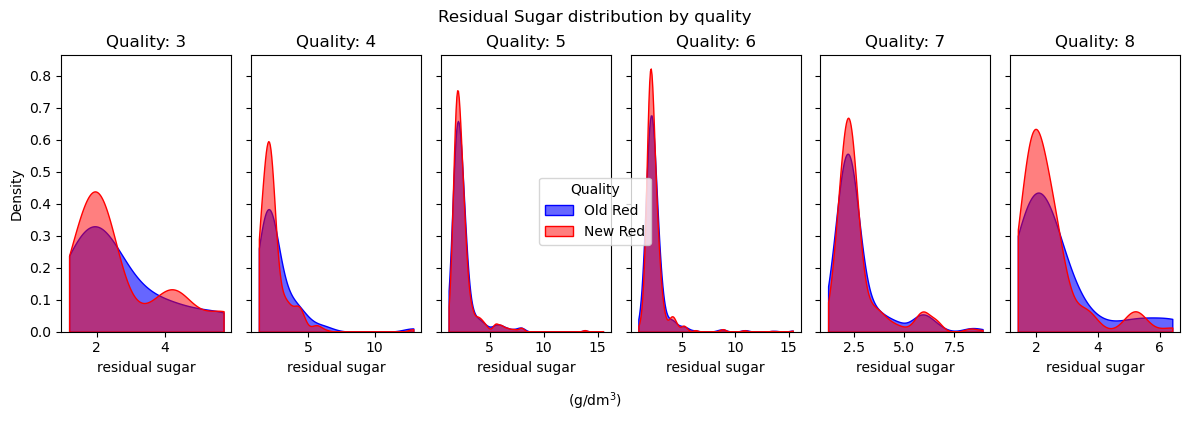

In [37]:
wineplot(old_red,new_red,'residual sugar','Residual Sugar distribution by quality','(g/dm$^3$)','Red')
comparison(old_red,new_red,'residual sugar','Residual Sugar distribution by quality','(g/dm$^3$)','Red')

Clearly the red data has a high preference to residual sugar around the 2.3g/dm$^3$ mark

#### Chlorides (NaCl)

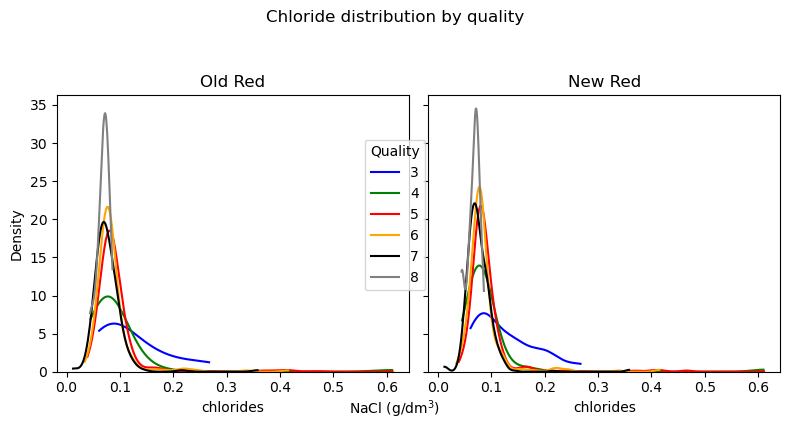

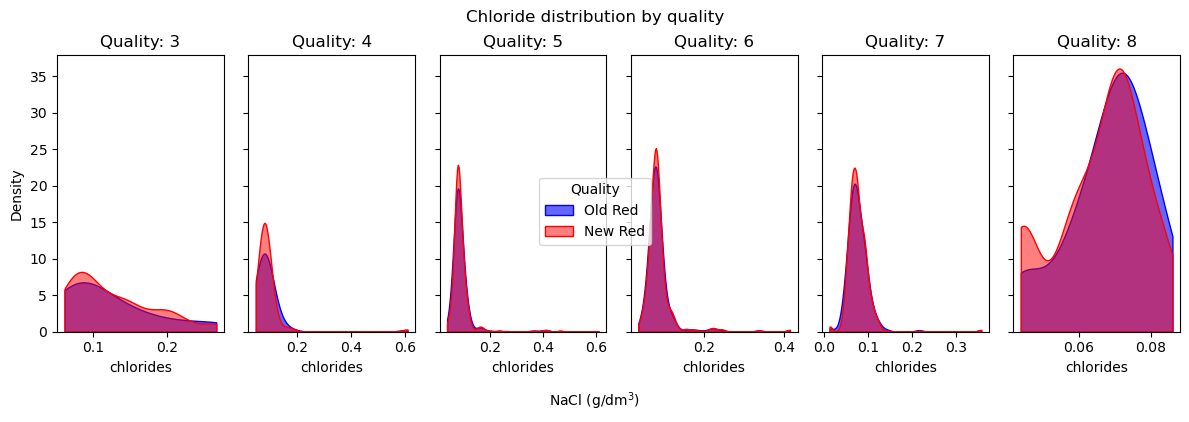

In [38]:
wineplot(old_red,new_red,'chlorides','Chloride distribution by quality','NaCl (g/dm$^3$)','Red')
comparison(old_red,new_red,'chlorides','Chloride distribution by quality','NaCl (g/dm$^3$)','Red')

Lower chloride levels appear to be favoured by higher quality red wines

#### Free Sulfur Dioxide (SO$_2$)

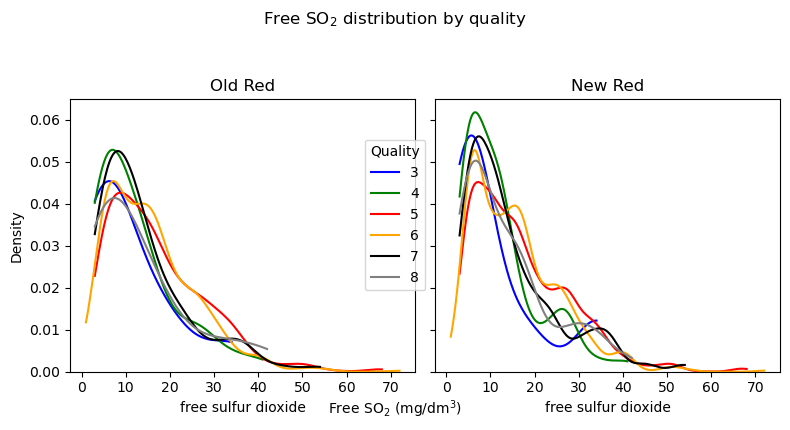

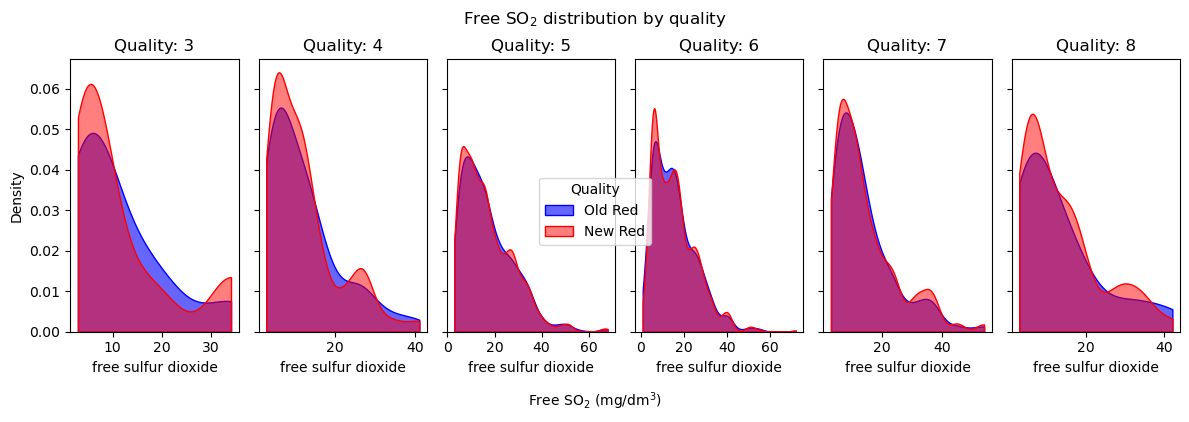

In [39]:
wineplot(old_red,new_red,'free sulfur dioxide','Free SO$_2$ distribution by quality','Free SO$_2$ (mg/dm$^3$)','Red')
comparison(old_red,new_red,'free sulfur dioxide','Free SO$_2$ distribution by quality','Free SO$_2$ (mg/dm$^3$)','Red')

There appears to be minor variation between quality levels

#### Total Sulfur Dioxide (SO$_2$)

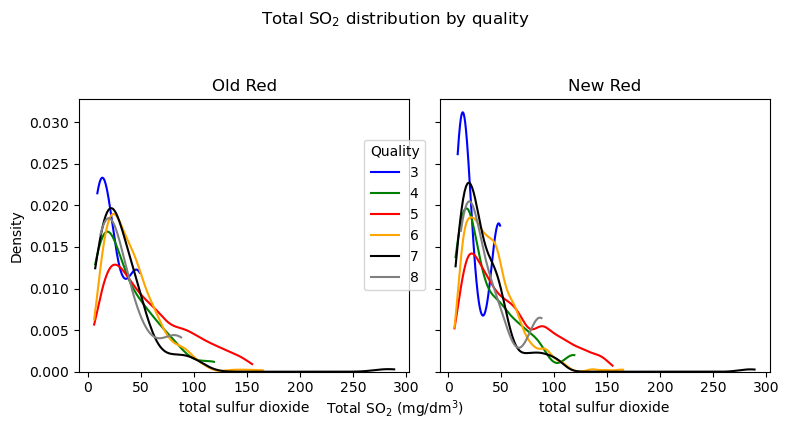

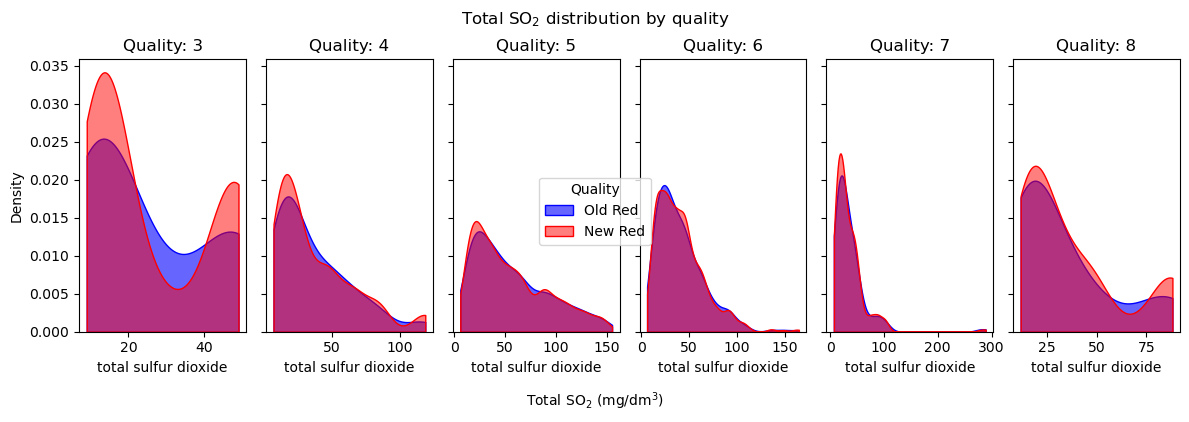

In [40]:
wineplot(old_red,new_red,'total sulfur dioxide','Total SO$_2$ distribution by quality','Total SO$_2$ (mg/dm$^3$)','Red')
comparison(old_red,new_red,'total sulfur dioxide','Total SO$_2$ distribution by quality','Total SO$_2$ (mg/dm$^3$)','Red')

Other than the apparent presence of more duplicates in new quality 3 wines, there seems little difference.

#### Density

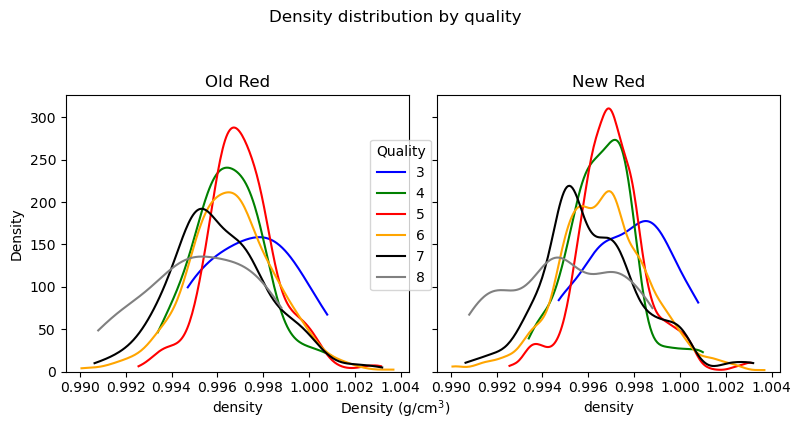

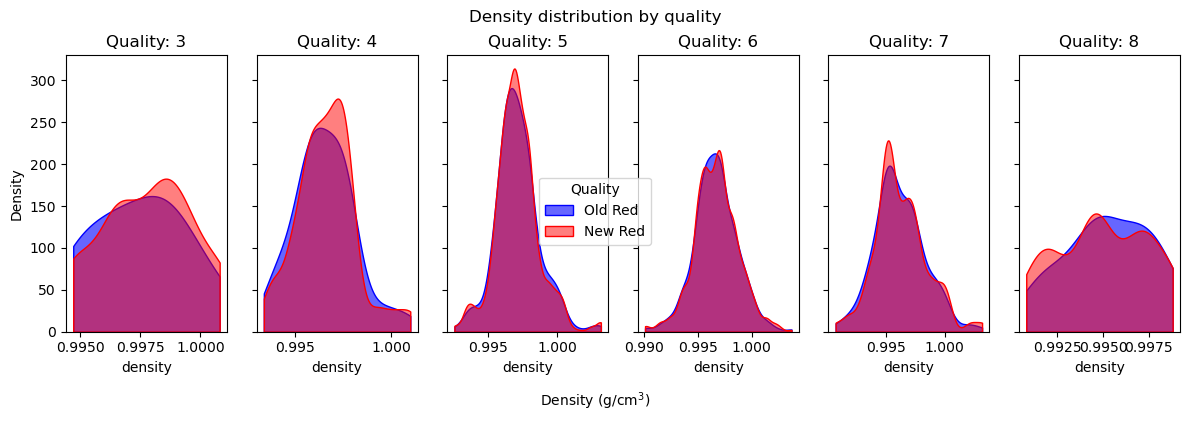

In [41]:
wineplot(old_red,new_red,'density','Density distribution by quality','Density (g/cm$^3$)','Red')
comparison(old_red,new_red,'density','Density distribution by quality','Density (g/cm$^3$)','Red')

Little to take from this

#### Sulphates (K$_2$SO$_4$)

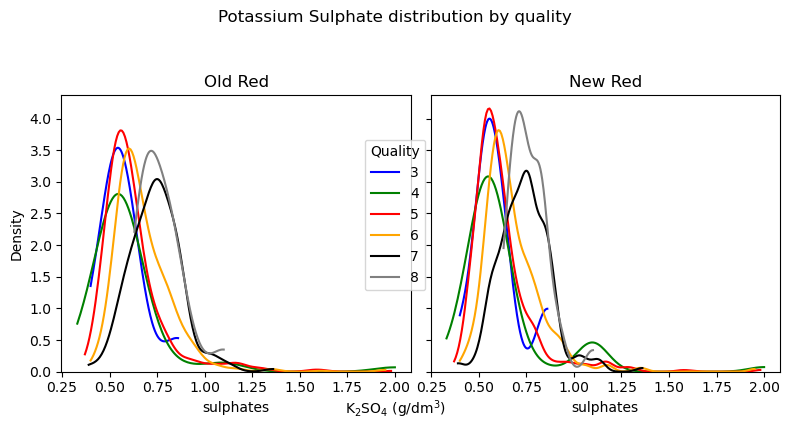

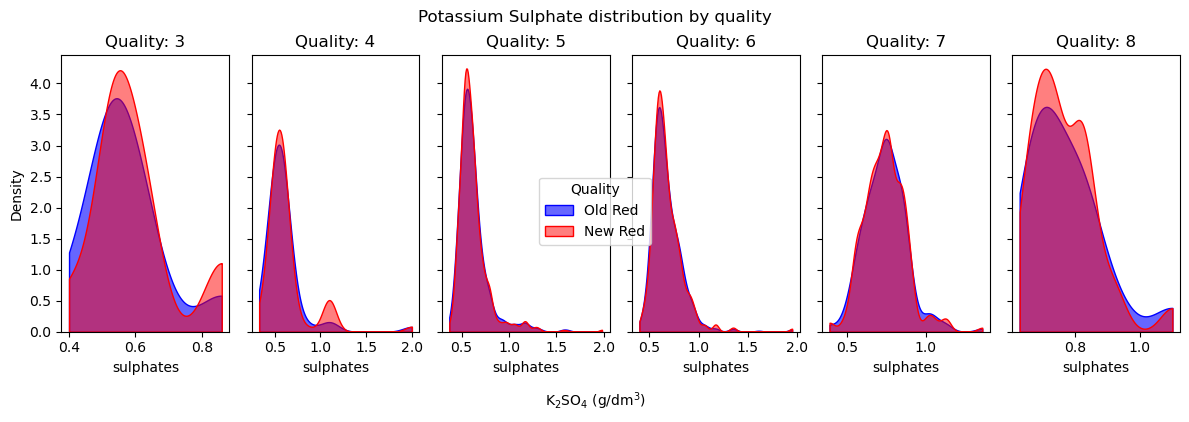

In [42]:
wineplot(old_red,new_red,'sulphates','Potassium Sulphate distribution by quality','K$_2$SO$_4$ (g/dm$^3$)','Red')
comparison(old_red,new_red,'sulphates','Potassium Sulphate distribution by quality','K$_2$SO$_4$ (g/dm$^3$)','Red')

Higher quality reds seem to be centered around a higher sulphate level. Again direct comparison old to new is difficult when levels are segregated

#### pH (-log[H$^+$])

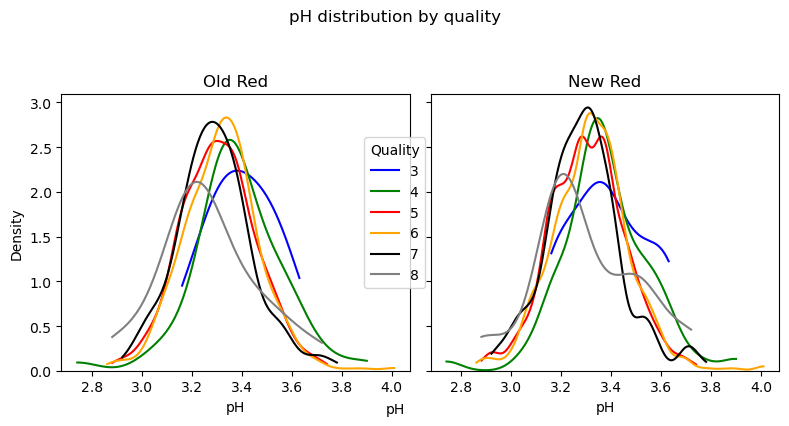

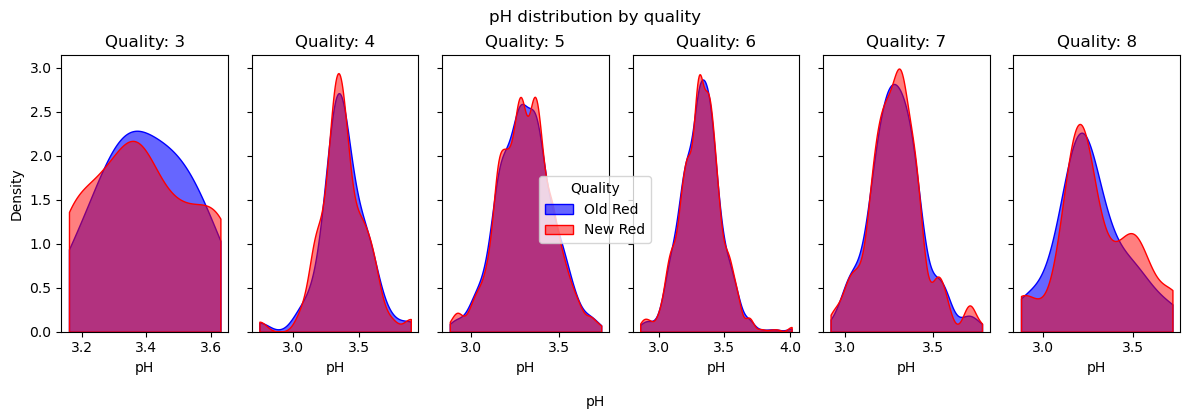

In [43]:
wineplot(old_red,new_red,'pH','pH distribution by quality','pH','Red')
comparison(old_red,new_red,'pH','pH distribution by quality','pH','Red')

There is alot of overlap between old and new and across quality levels

#### Alcohol (abv /  ethanol vol%)

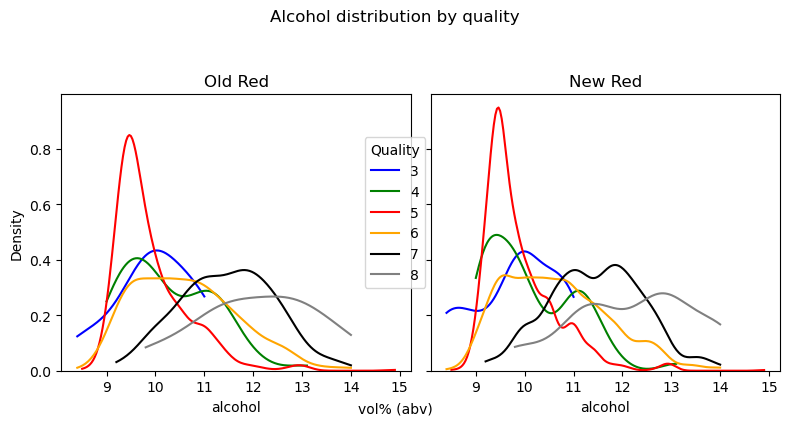

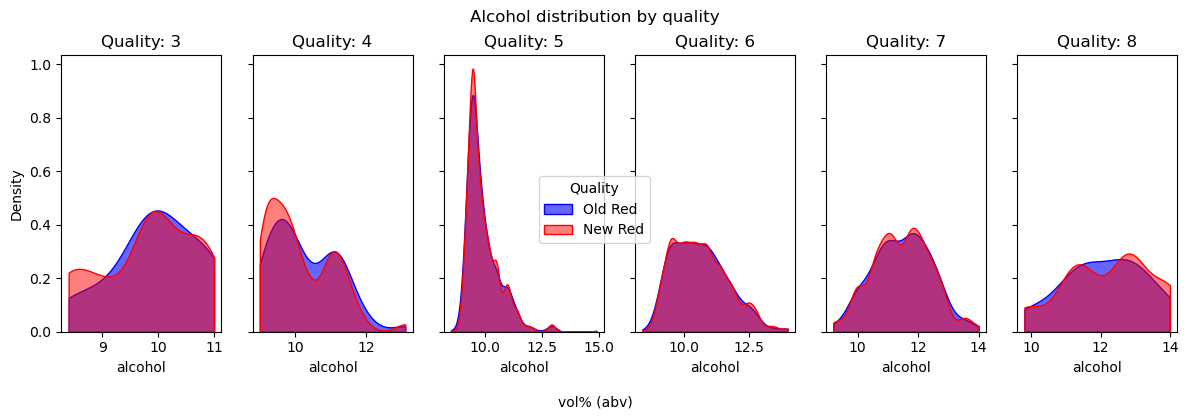

In [44]:
wineplot(old_red,new_red,'alcohol','Alcohol distribution by quality','vol% (abv)','Red')
comparison(old_red,new_red,'alcohol','Alcohol distribution by quality','vol% (abv)','Red')

Although these charts are only approximations, it is clear the differences are subtle at best and there is no benefit to comparing distribution averages. Ultimately what we want to compare is how the correlation between each variable and the quality varies between the datasets. Will check the White samples just to confirm that this is not a specific case for the Red data sets.

### White Wines
#### Fixed acidity (Tartaric Acid)

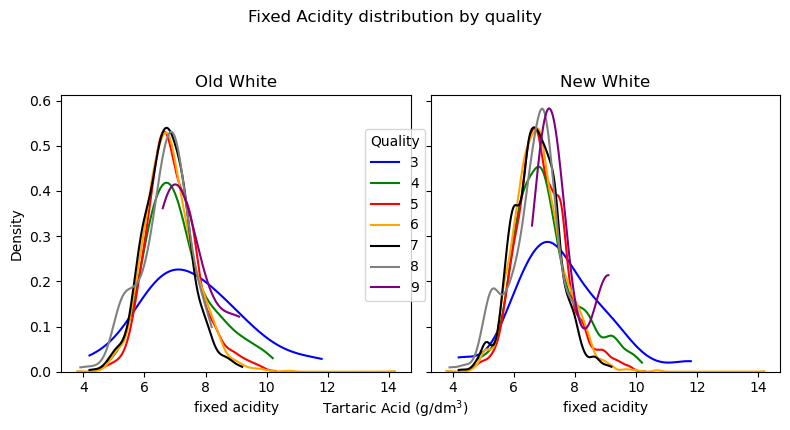

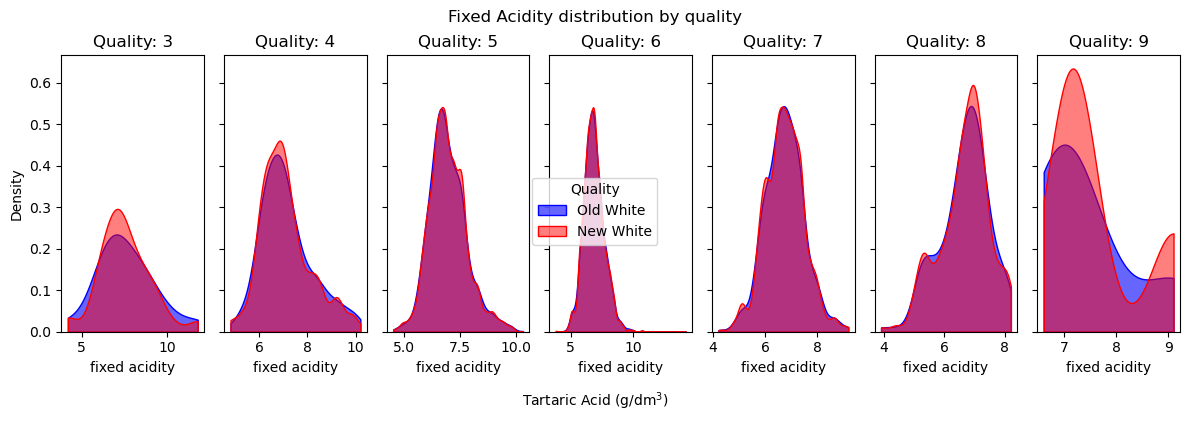

In [45]:
wineplot(old_white,new_white,'fixed acidity','Fixed Acidity distribution by quality','Tartaric Acid (g/dm$^3$)','White')
comparison(old_white,new_white,'fixed acidity','Fixed Acidity distribution by quality','Tartaric Acid (g/dm$^3$)','White')

Top quality whites have the biggest difference old to new and the lowest quality whites have the largest range of Tartaric acid levels

#### Volatile acidity (Acetic/Ethanoic acid/vinegar)

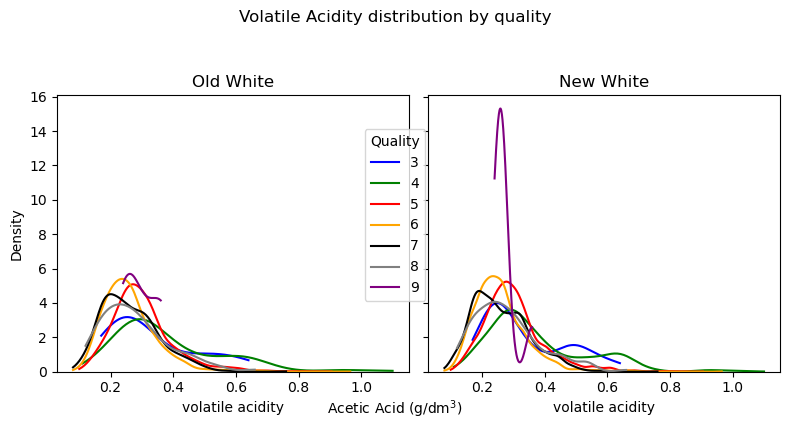

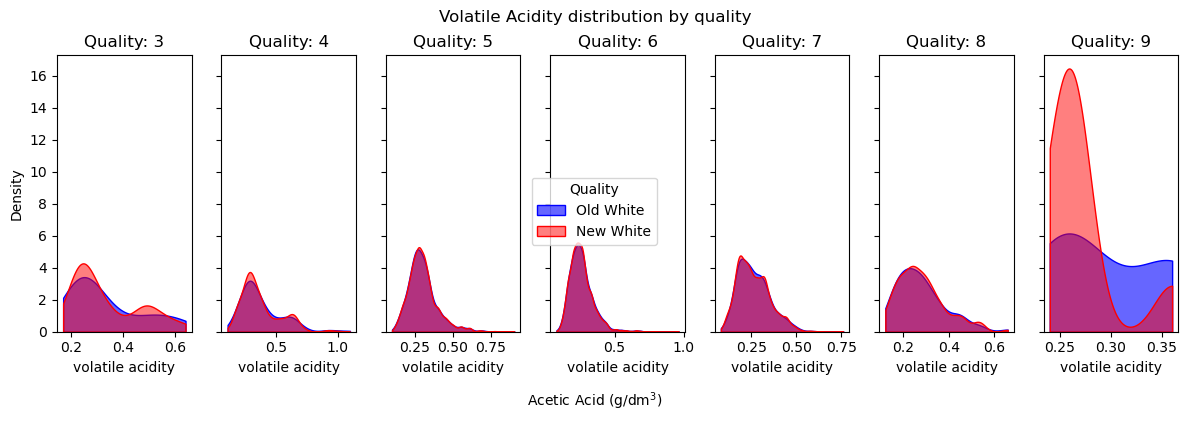

In [46]:
wineplot(old_white,new_white,'volatile acidity','Volatile Acidity distribution by quality','Acetic Acid (g/dm$^3$)','White')
comparison(old_white,new_white,'volatile acidity','Volatile Acidity distribution by quality','Acetic Acid (g/dm$^3$)','White')

Again level 9 whites have the biggest observable difference from old to new and it appears to show a refinement of optimum level.

#### Citric Acid

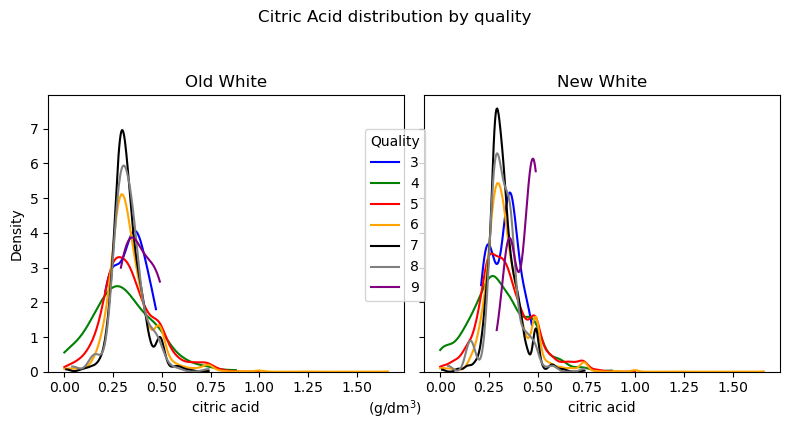

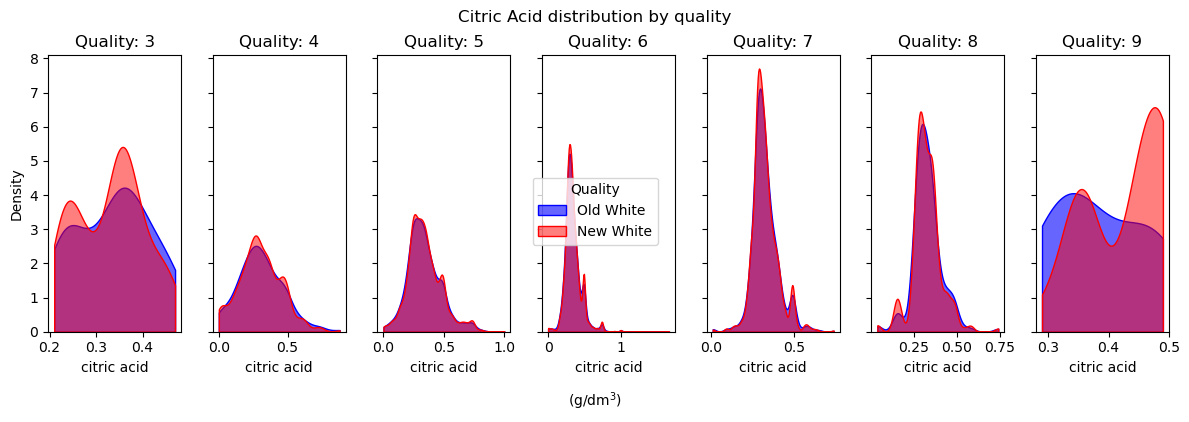

In [47]:
wineplot(old_white,new_white,'citric acid','Citric Acid distribution by quality','(g/dm$^3$)','White')
comparison(old_white,new_white,'citric acid','Citric Acid distribution by quality','(g/dm$^3$)','White')

Citric acid appears to show a shift or increase in preference for quality 9 wines

#### Residual Sugar

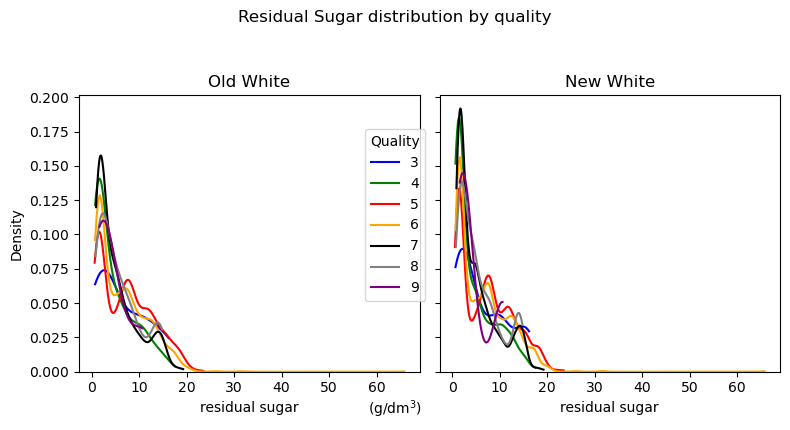

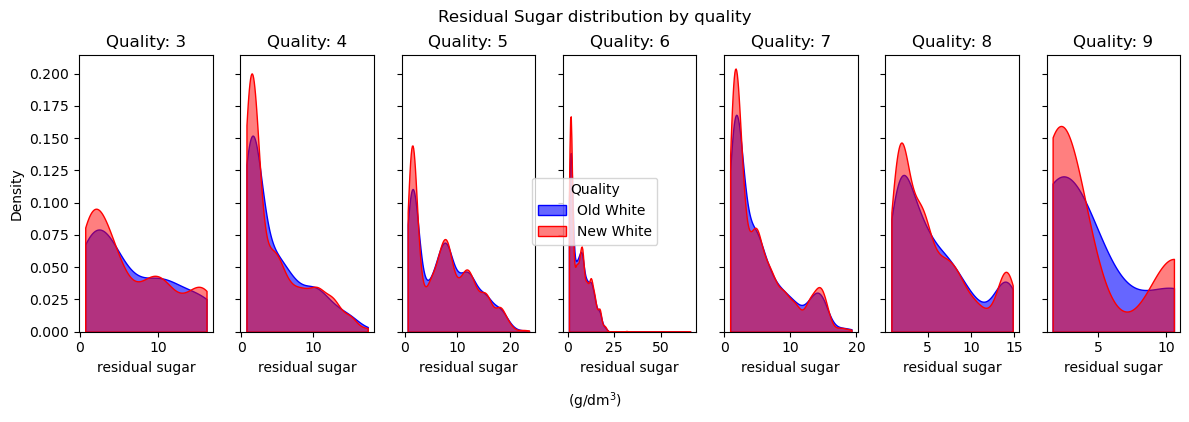

In [48]:
wineplot(old_white,new_white,'residual sugar','Residual Sugar distribution by quality','(g/dm$^3$)','White')
comparison(old_white,new_white,'residual sugar','Residual Sugar distribution by quality','(g/dm$^3$)','White')

As would be expected, the range of residual sugars for whites is far greater than that for reds though that range seems to decrease as the quality increases and again there seems to be an influence of duplicate values impacting the new data distribution

#### Chlorides (NaCl)

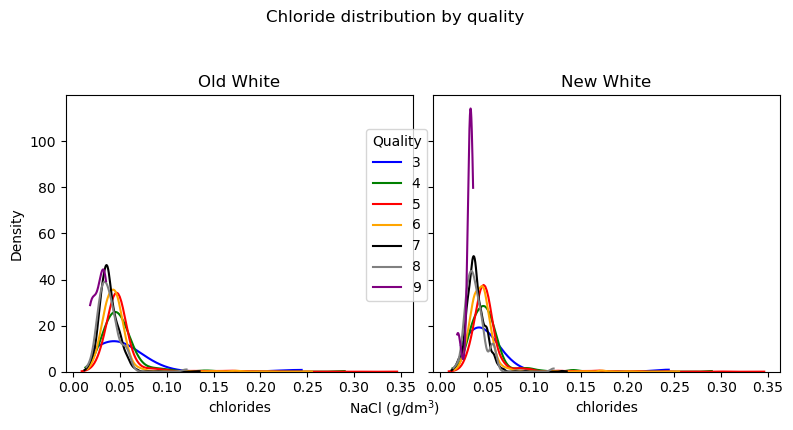

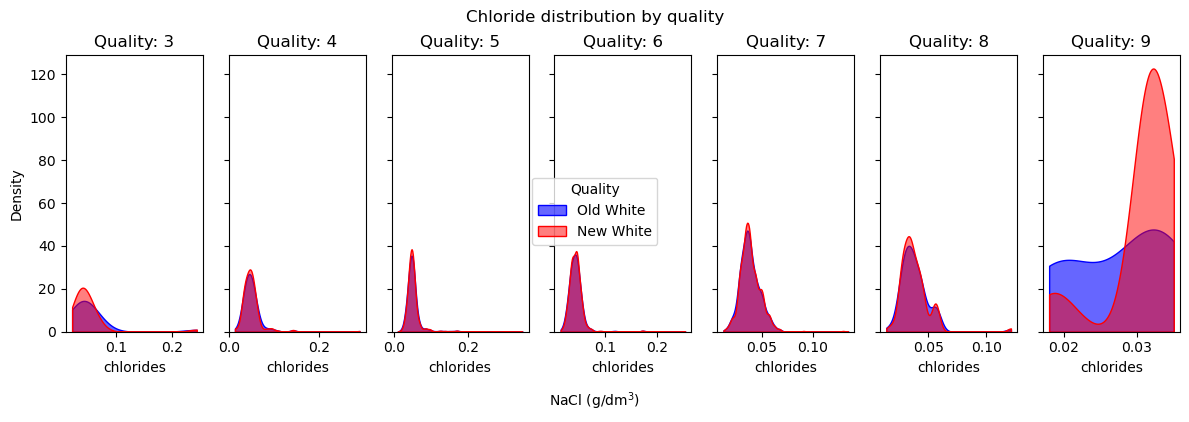

In [49]:
wineplot(old_white,new_white,'chlorides','Chloride distribution by quality','NaCl (g/dm$^3$)','White')
comparison(old_white,new_white,'chlorides','Chloride distribution by quality','NaCl (g/dm$^3$)','White')

Chlorides seem to also have a negative impact on quality with quality 9 whites having more specific values in the new dataset

####  Free Sulfur Dioxide (SO$_2$)

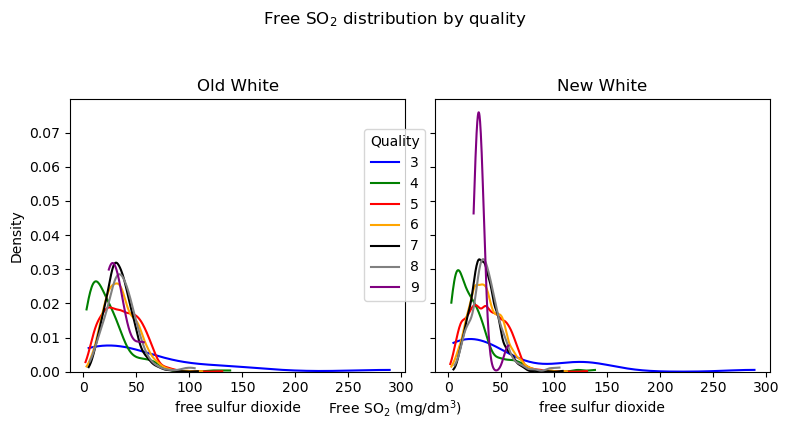

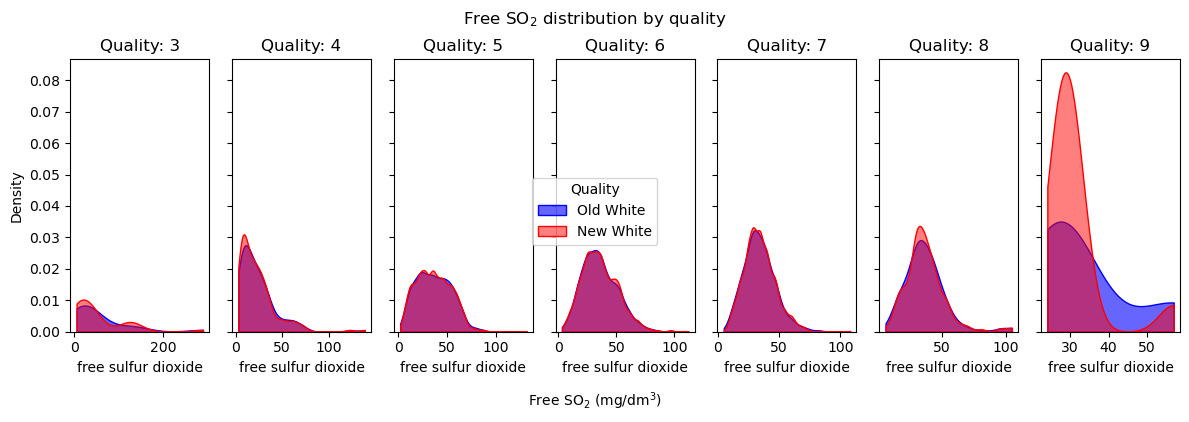

In [50]:
wineplot(old_white,new_white,'free sulfur dioxide','Free SO$_2$ distribution by quality','Free SO$_2$ (mg/dm$^3$)','White')
comparison(old_white,new_white,'free sulfur dioxide','Free SO$_2$ distribution by quality','Free SO$_2$ (mg/dm$^3$)','White')

The lower levels in high quality wines amd potentially the difference in sample sizes seem to accentuate the change in overlays

#### Total Sulfur Dioxide (SO$_2$)

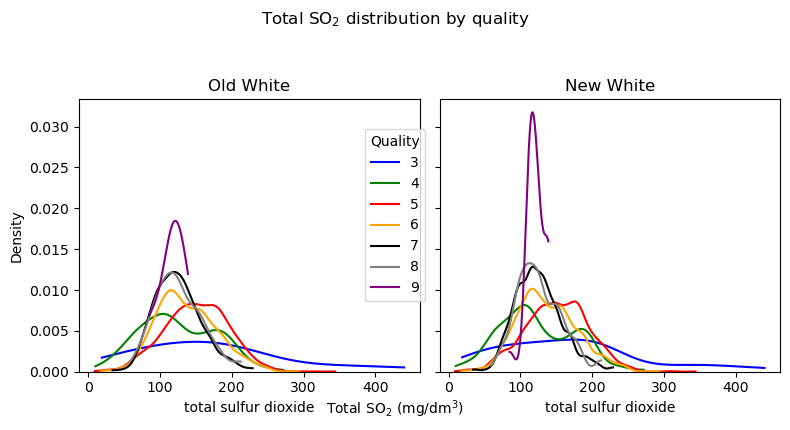

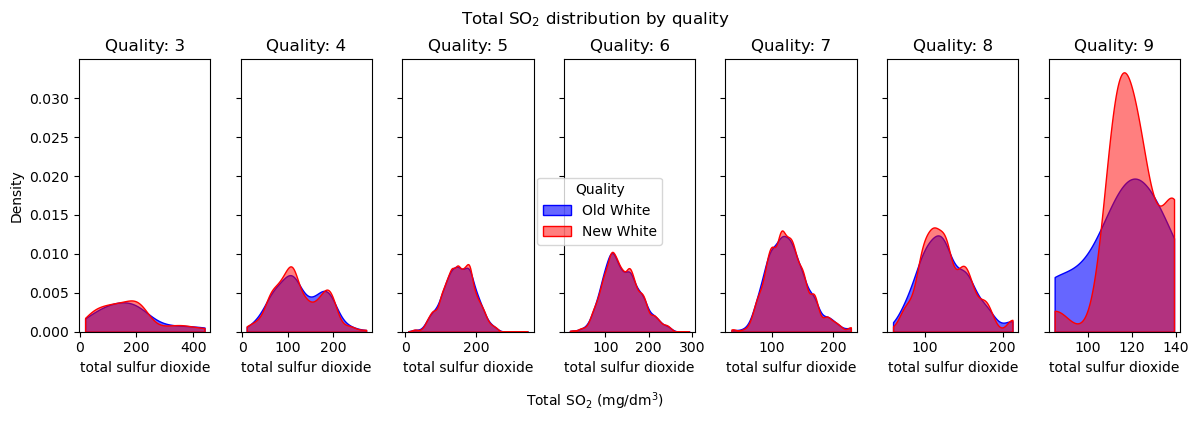

In [51]:
wineplot(old_white,new_white,'total sulfur dioxide','Total SO$_2$ distribution by quality','Total SO$_2$ (mg/dm$^3$)','White')
comparison(old_white,new_white,'total sulfur dioxide','Total SO$_2$ distribution by quality','Total SO$_2$ (mg/dm$^3$)','White')

Again a trend in narrowing the range for higher quality wines and that trend is also seen from old to new 

#### Density

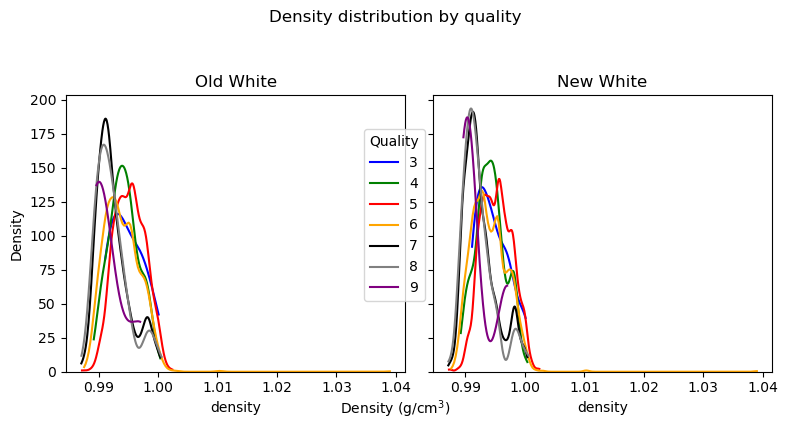

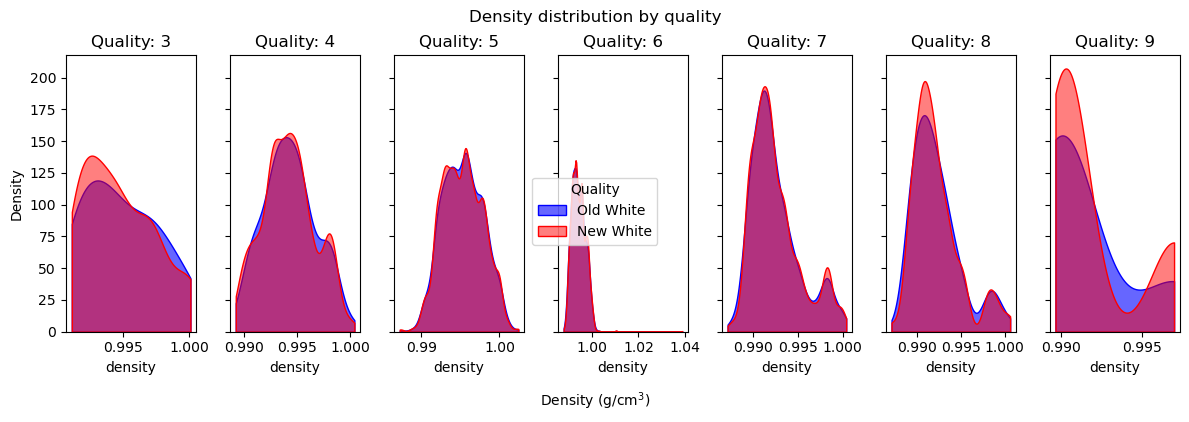

In [52]:
wineplot(old_white,new_white,'density','Density distribution by quality','Density (g/cm$^3$)','White')
comparison(old_white,new_white,'density','Density distribution by quality','Density (g/cm$^3$)','White')

Again little to see in these comparisons

#### pH (-log[H$^+$])

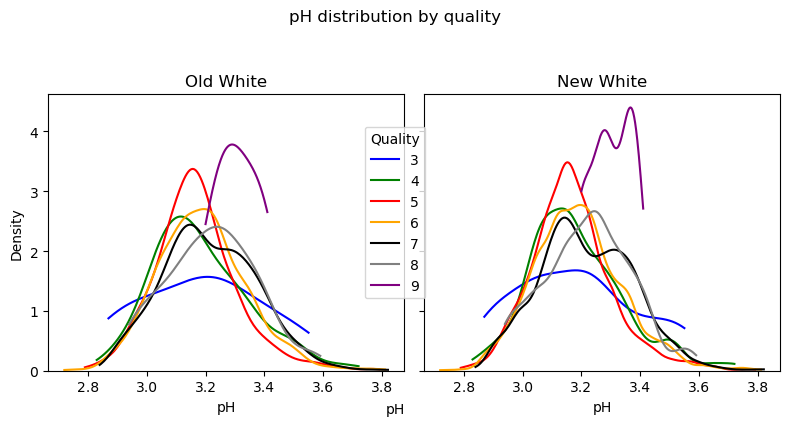

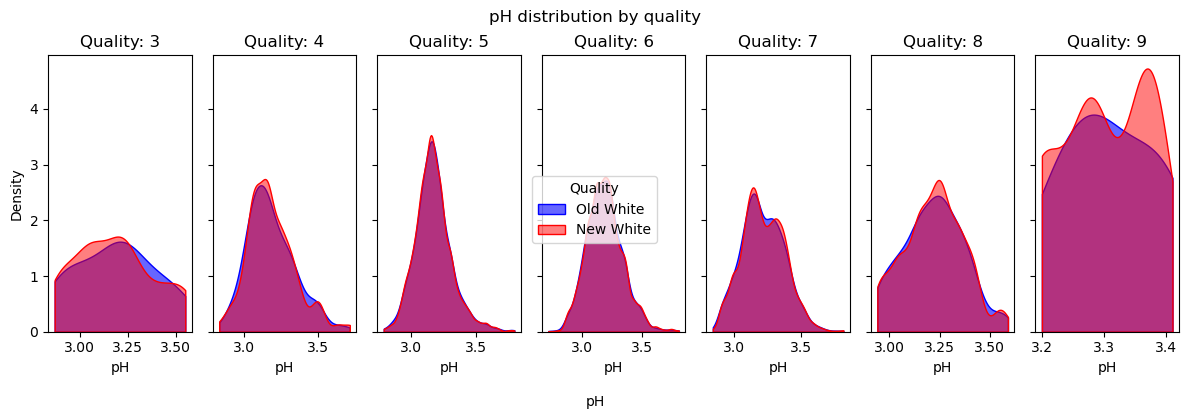

In [53]:
wineplot(old_white,new_white,'pH','pH distribution by quality','pH','White')
comparison(old_white,new_white,'pH','pH distribution by quality','pH','White')

The range seems to tighten as quality increases and at level 9 tightens further from old to new.

#### Sulphates (K$_2$SO$_4$)

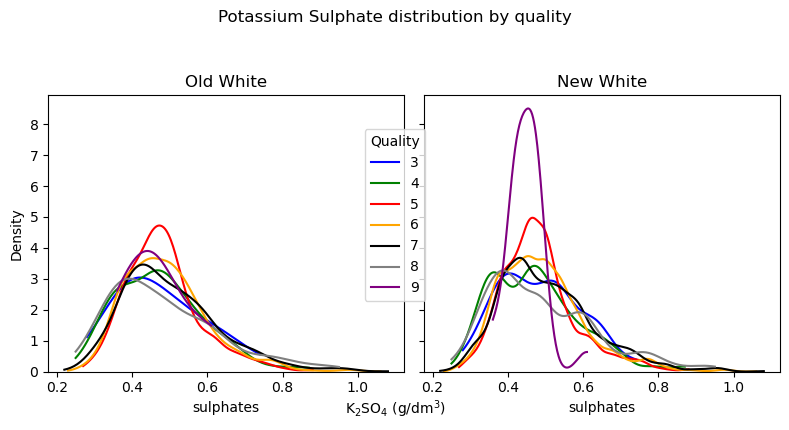

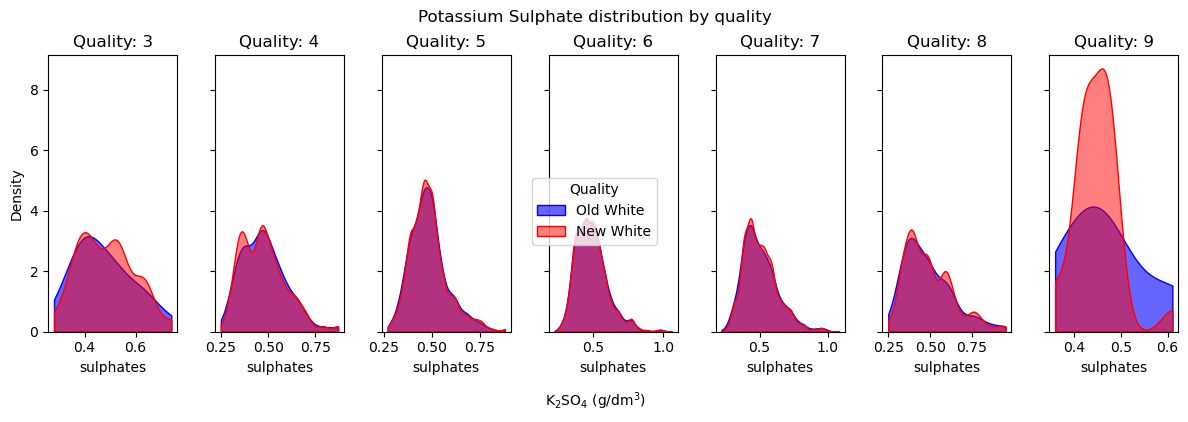

In [54]:
wineplot(old_white,new_white,'sulphates','Potassium Sulphate distribution by quality','K$_2$SO$_4$ (g/dm$^3$)','White')
comparison(old_white,new_white,'sulphates','Potassium Sulphate distribution by quality','K$_2$SO$_4$ (g/dm$^3$)','White')

Other than narrowing from old to new in quality 9, little to note here

#### Alcohol (abv/ ethanol vol%)

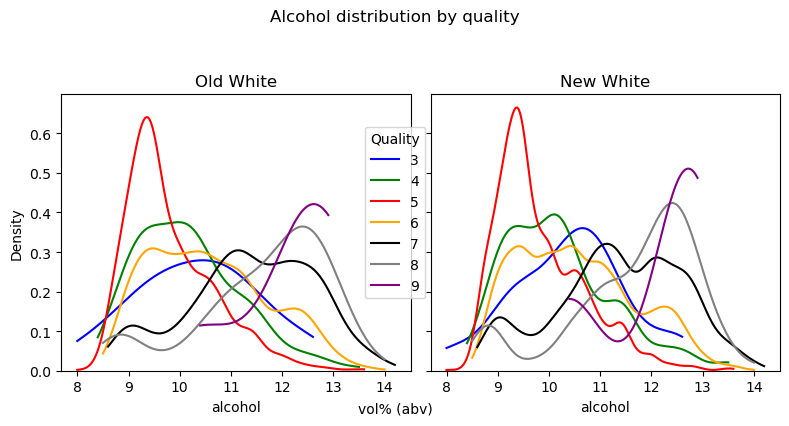

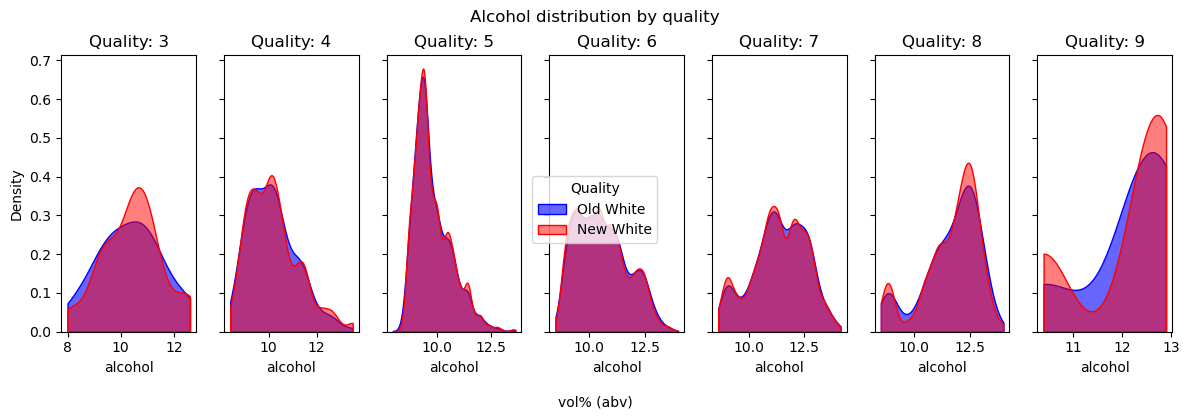

In [55]:
wineplot(old_white,new_white,'alcohol','Alcohol distribution by quality','vol% (abv)','White')
comparison(old_white,new_white,'alcohol','Alcohol distribution by quality','vol% (abv)','White')

As with the Red data, there is alot of overlap in the distributions for the White data, making a comparison of averages meaningless. In looking at the shape, however, particularly in the high end category (quality=9), some distinct differences are noticeable. The densities in the sulphates, chlorides and SO$_2$ variables appear to change for this quality level.

### Correlations

In [56]:
# Calculate correlation for for each feature with the "quality" column in each dataset
corr_old_red = old_red.corr()['quality']
corr_new_red = new_red.corr()['quality']
corr_old_white = old_white.corr()['quality']
corr_new_white = new_white.corr()['quality']

# Concatenate the correlation results along columns
corr1 = pd.concat([corr_old_red, corr_new_red, corr_old_white, corr_new_white], axis=1)

# Rename columns
corr1.columns = ['Old Red corr', 'New Red corr', 'Old White corr', 'New White corr']

# Remove the last row, as it contains the correlation of "quality" with itself
corr1 = corr1.iloc[:-1]

corr1

,Old Red corr,New Red corr,Old White corr,New White corr
fixed acidity,0.124052,0.131804,-0.113663,-0.111200
volatile acidity,-0.390558,-0.381235,-0.194723,-0.200379
citric acid,0.226373,0.223381,-0.009209,-0.015347
residual sugar,0.013732,0.019318,-0.097577,-0.087034
chlorides,-0.128907,-0.132864,-0.209934,-0.210166
free sulfur dioxide,-0.050656,-0.036939,0.008158,0.021525
total sulfur dioxide,-0.185100,-0.184952,-0.174737,-0.163341
density,-0.174919,-0.164694,-0.307123,-0.292692
pH,-0.057731,-0.045689,0.099427,0.106599
sulphates,0.251397,0.240112,0.053678,0.058170


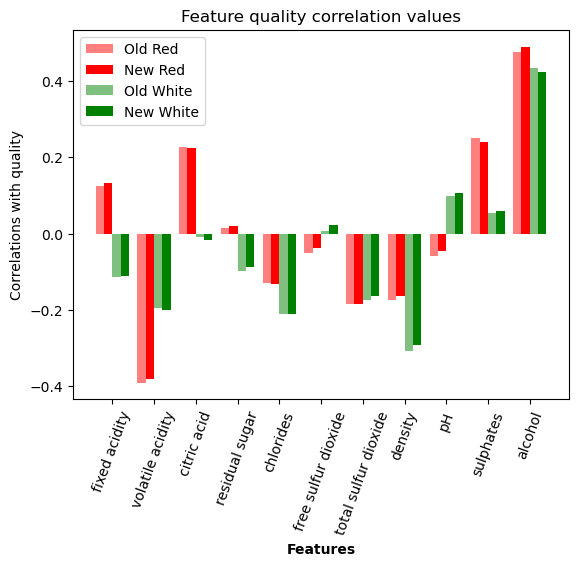

In [57]:
features=corr1.index.tolist()
width =0.2
ind = np.arange(11)
plt.bar(ind, corr_old_red[:-1], width, color='red', alpha=0.5, label='Old Red')
plt.bar(ind+width, corr_new_red[:-1], width, color='red', alpha=1, label='New Red')
plt.bar(ind +2*width, corr_old_white[:-1], width, color='green', alpha=0.5, label='Old White')
plt.bar(ind+ 3*width, corr_new_white[:-1], width, color='green', alpha=1, label='New White')
plt.xticks(ind + 3*width/2 , features, rotation=70)  
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Correlations with quality')
plt.title('Feature quality correlation values')
plt.legend()
plt.show()

Important to note here that the sign never changes from old to new.

### Data variation
#### Standard deviations
From approximated distributions between old and new earlier, there appears to be the largest difference between dataset distributions in white wine observations with a quality value 9. lets investigate this sub group more.

In [58]:
# subset the data selecting white wines with quality 9:
oldwhite9 = old_white[old_white['quality']==9]
newwhite9 = new_white[new_white['quality']==9]

In [59]:
# create a function to perform an inputted function across the columns of old 
# and new dataframes returning a table with the function values and the 
# signed differences (new-old)
def my_stats(df1,df2,func,funcname):
    #initialise old,new and diff dictionaries
    old={}
    new={}
    diff={}
    pdiff={}
    #title the table
    print("Comparison of "+funcname+"s:")
    #loop over column names
    for name in df1.columns[:-1]:
        #Evaluate the function for the named column for each dataframe
        old[name]=func(df1[name])
        new[name]=func(df2[name])
        #Evaluate the difference
        diff[name]=new[name]-old[name]
        #Evaluate the percentage difference
        pdiff[name]=round(100*diff[name]/old[name],2)
    #create dataframe from the dictionaries
    df = pd.DataFrame([old,new,diff,pdiff],index=['Old','New','Difference','%']).T 
    return df

In [60]:
table1 =my_stats(oldwhite9,newwhite9,np.std,'standard deviation')
table1

Comparison of standard deviations:


,Old,New,Difference,%
fixed acidity,0.879545,0.864490,-0.015055,-1.71
volatile acidity,0.051536,0.035707,-0.015829,-30.71
citric acid,0.073376,0.064464,-0.008912,-12.15
residual sugar,3.362380,3.632483,0.270103,8.03
chlorides,0.006651,0.004755,-0.001896,-28.51
free sulfur dioxide,12.009996,8.037996,-3.972000,-33.07
total sulfur dioxide,17.731328,12.698152,-5.033177,-28.39
density,0.002789,0.002914,0.000125,4.48
pH,0.074135,0.070529,-0.003606,-4.86
sulphates,0.082849,0.048216,-0.034633,-41.80


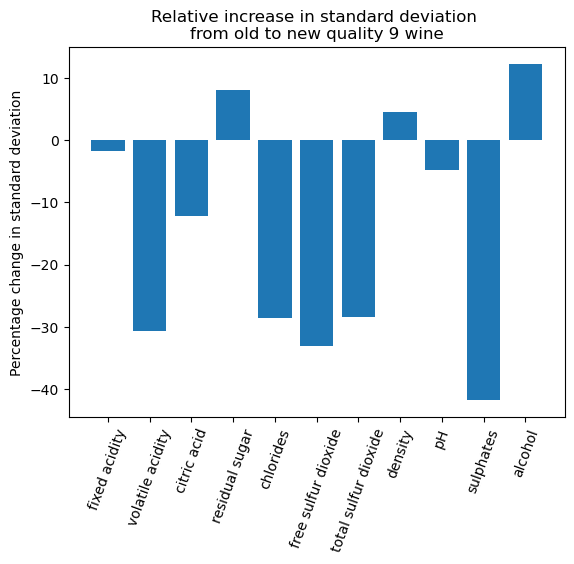

In [61]:
plt.bar(range(11),table1['%'])
plt.xticks(range(11), features, rotation=70)
plt.ylabel('Percentage change in standard deviation')
plt.title('Relative increase in standard deviation \nfrom old to new quality 9 wine')
plt.show()

Can see sizable relative shifts in the variation of values, particularly for sulphates, SO$_2$, chlorides, and volatile acidity (acetic acid). These larger changes all signify a drop in variability for the features indicating that the range of acceptable values for this category is becoming more specific.

#### Means

In [62]:
# Compare the means
my_stats(oldwhite9,newwhite9,np.mean,'mean')


Comparison of means:


,Old,New,Difference,%
fixed acidity,7.42000,7.637500,0.217500,2.93
volatile acidity,0.29800,0.270000,-0.028000,-9.40
citric acid,0.38600,0.426667,0.040667,10.54
residual sugar,4.12000,4.391667,0.271667,6.59
chlorides,0.02740,0.030875,0.003475,12.68
free sulfur dioxide,33.40000,31.125000,-2.275000,-6.81
total sulfur dioxide,116.00000,121.583333,5.583333,4.81
density,0.99146,0.991969,0.000509,0.05
pH,3.30800,3.299167,-0.008833,-0.27
sulphates,0.46600,0.447917,-0.018083,-3.88


The relative shifts in means is not as sizable with the maximum change being ~12.7% for chlorides.

#### Medians

In [63]:
my_stats(oldwhite9,newwhite9,np.median,'median')

Comparison of medians:


,Old,New,Difference,%
fixed acidity,7.1000,7.250000,0.150000,2.11
volatile acidity,0.2700,0.260000,-0.010000,-3.70
citric acid,0.3600,0.450000,0.090000,25.00
residual sugar,2.2000,2.200000,0.000000,0.00
chlorides,0.0310,0.032000,0.001000,3.23
free sulfur dioxide,28.0000,28.000000,0.000000,0.00
total sulfur dioxide,119.0000,121.500000,2.500000,2.10
density,0.9903,0.990425,0.000125,0.01
pH,3.2800,3.280000,0.000000,0.00
sulphates,0.4600,0.460000,0.000000,0.00


The changes observed in means are not necessarily reflected in the medians. Small sample size is likely to be factoring in here.

In [64]:
owlen = old_white.shape[0]
nwlen = new_white.shape[0]
print(f"The old white level 9 data reflects {round(100*oldwhite9.shape[0]/ owlen,5)}% of the old white dataset with {oldwhite9.shape[0]} values,\nwhilst the new white level 9 data reflects {round(100*newwhite9.shape[0]/ nwlen,5)}% of the new white data set with {newwhite9.shape[0]}.")

The old white level 9 data reflects 0.10208% of the old white dataset with 5 values,
whilst the new white level 9 data reflects 0.09815% of the new white data set with 24.


## Statistical Analysis
### Approach
Investigate the correlations between feature variables and quality and how they have changed from 2009 to 2023. Take a Bayesian approach to the analysis and use "Hacker statistics". To do this:
1. Find the difference in correlation coefficients between old and new datasets
2. Further split the datasets into groups by the 'quality' variable
3. Record the number of rows for each instance
4. Concatenate the old and new sets
5. Permute the rows of the concatenated datasets
6. Split the permuted sets according to their original proportions
7. Recombine permuted instances with other quality groups
8. Evaluate the new correlations for each permuted "dataset"
9. Find the difference in correlations between permuted old and new datasets
10. Repeat steps 5 to 9 many times
11. Find the proportion of permutation runs with the same sign and at least as great a magnitude as the original differences. This is the probability that the observed differences are by random chance.
12. From the bootstrap correlation differences, determine the z-scores and confidence levels of observed directional change not due to random chance.


### Analysis

#### 1. Find the difference in correlation coefficients between old and new datasets

In [65]:
# Use the previously defined corr1 dataframe of correlation coefficients to
# evaluate the differences between old and new for red and white. A negative 
# difference signifying a drop in magnitude from old to new. Store the dataframe 
# for later reference.
original_corr_diff=pd.DataFrame({'White': abs(corr1['New White corr'])-abs(corr1['Old White corr']),
                                'Red': abs(corr1['New Red corr'])-abs(corr1['Old Red corr'])
                                })
original_corr_diff

,White,Red
fixed acidity,-0.002463,0.007752
volatile acidity,0.005656,-0.009323
citric acid,0.006138,-0.002991
residual sugar,-0.010543,0.005586
chlorides,0.000231,0.003957
free sulfur dioxide,0.013367,-0.013717
total sulfur dioxide,-0.011396,-0.000149
density,-0.014432,-0.010225
pH,0.007172,-0.012042
sulphates,0.004492,-0.011285


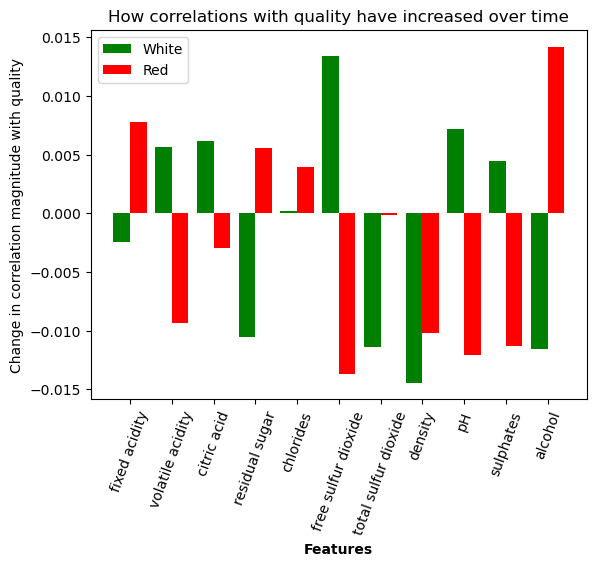

In [66]:
features=original_corr_diff.index.tolist()
w=original_corr_diff['White']
r=original_corr_diff['Red']
width =0.4
ind = np.arange(11)
plt.bar(ind, w, width, color='green', alpha=1, label='White')
plt.bar(ind+width, r, width, color='red', alpha=1, label='Red')
plt.xticks(ind + width / 2, features, rotation=70)  
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Change in correlation magnitude with quality')
plt.title('How correlations with quality have increased over time')
plt.legend()
plt.show()

#### 2. Further split the datasets into groups by the 'quality' variable
We will identify dataframes by Old (O) or New (N), then Red (R) or White(W) then by quality value
##### Old Red

In [67]:
# Create a splitter function to generate the split dataframe from the input name
def splitter(name):
    if name[0]=='O': #if old
        if name[1]=='R': #if red
            df=old_red
        else: #if white
            df=old_white
    else: #if new
        if name[1]=='R': #if red
            df=new_red
        else: #if white
            df=new_white
    ind= int(name[2]) #extract quality index
    return df[df['quality']==ind] #selected source dataframe subsetted by quality index

In [68]:
# Create Dataframes
OR3 = splitter('OR3')
OR4 = splitter('OR4')
OR5 = splitter('OR5')
OR6 = splitter('OR6')
OR7 = splitter('OR7')
OR8 = splitter('OR8')

##### New Red

In [69]:
# Create Dataframes
NR3 = splitter('NR3')
NR4 = splitter('NR4')
NR5 = splitter('NR5')
NR6 = splitter('NR6')
NR7 = splitter('NR7')
NR8 = splitter('NR8')

##### Old White

In [70]:
# Create Dataframes
OW3 = splitter('OW3')
OW4 = splitter('OW4')
OW5 = splitter('OW5')
OW6 = splitter('OW6')
OW7 = splitter('OW7')
OW8 = splitter('OW8')
OW9 = splitter('OW9')

##### New White

In [71]:
# Create Dataframes
NW3 = splitter('NW3')
NW4 = splitter('NW4')
NW5 = splitter('NW5')
NW6 = splitter('NW6')
NW7 = splitter('NW7')
NW8 = splitter('NW8')
NW9 = splitter('NW9')

#### 3. Record the number of rows for each instance
This isn't necessary to store in a dataframe as it can be retrieved by taking the 1st element of the shape attribute of the corresponding instance eg:

In [72]:
NW3.shape[0]

85

#### 4. Concatenate the old and new sets
##### White

In [73]:
#Generate combined dataframes
wcom3 = pd.concat([OW3,NW3])
wcom4 = pd.concat([OW4,NW4])
wcom5 = pd.concat([OW5,NW5])
wcom6 = pd.concat([OW6,NW6])
wcom7 = pd.concat([OW7,NW7])
wcom8 = pd.concat([OW8,NW8])
wcom9 = pd.concat([OW9,NW9])

##### Red

In [74]:
#Generate combined dataframes
rcom3 = pd.concat([OR3,NR3])
rcom4 = pd.concat([OR4,NR4])
rcom5 = pd.concat([OR5,NR5])
rcom6 = pd.concat([OR6,NR6])
rcom7 = pd.concat([OR7,NR7])
rcom8 = pd.concat([OR8,NR8])

Steps 5. to 9. form the components of the looping function in step 10.

#### 5. Permute the rows of the concatenated datasets
This will use the np.random.permute function in the form: df.iloc[np.random.permutation(df.shape[0])]

In [75]:
# create perm function:
def perm(df):
    return df.iloc[np.random.permutation(df.shape[0])]

In [76]:
# Verify the perm function with rcom3:
test = perm(rcom3)
print(test.shape)
test.head()

(58, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
22769,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2524,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
21575,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
18252,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


#### 6. Split the permuted sets according to their original proportions
This will be done by subsetting the rows of the permuted sets based on the original dataset shapes described in 3.

In [77]:
# create a function to return permuted old and new dataframes from a combined input
def perm_generator(df,name):
    #create a dictionary that maps string indicators from the name to dataframes
    name_map={'r3': OR3,'r4': OR4, 'r5': OR5, 'r6': OR6, 'r7': OR7, 'r8': OR8, 'w3': OW3, 'w4': OW4, 'w5': OW5, 'w6': OW6, 'w7': OW7, 'w8': OW8, 'w9': OW9}
    #extract the quality level from the name string
    qual=name[4]
    #extract the wine colour from the text string
    col=name[0]
    #find the number of rows in the old dataframe subset using the name_map dictionary
    oldlength = name_map[str(col+qual)].shape[0]
    #permute the rows of the commbined dataset using perm function
    df1=perm(df)
    #split the dataframe based on the number of rows in the old dataframe subset
    old=df1[:oldlength]
    new=df1[oldlength:]
    return old,new

In [78]:
# Check function with rcom3:
np.random.seed(94)
old_test,new_test = perm_generator(rcom3,'rcom3')
print(old_test.shape,new_test.shape)

(10, 12) (48, 12)


In [79]:
#Check if permuted dataframe is unchanged
old_test.items()==OR3.items()

False

In [80]:
new_test.items()==NR3.items()

False

#### 7. Recombine permuted instances with other quality groups
This will be done by concatenation, using pd.concat([permold, old], ignore_index=True) within the loops.

#### 8. Evaluate the new correlations for each permuted "dataset"
This will be achieved using the .corr() method between each feature variable and quality, giving 4 values for each of the features corresponding to the old, new and red, white datasets. eg old_test['density'].corr(old_test['quality'])

#### 9. Find the difference in correlations between permuted old and new datasets
As in step 1. subtract the permuted old correlation coefficients (step 8.) from the new and append to a list.

In [81]:
# Create a function to return a list of correlation differences:
def evalcordiff(df1,df2):
    #list of differences
    diffs=[]
    # loop over all variable columns except quality
    for i in range(len(df1.columns)-1):
        # determine the correlation coefficient between the feature and quality
        old = abs(df1[df1.columns[i]].corr(df1['quality']))
        new = abs(df2[df2.columns[i]].corr(df2['quality']))
        # append the differences list
        diffs.append(new-old)
        
    return diffs


In [82]:
# Check function with original red datasets
evalcordiff(old_red,new_red)

[0.007752490655765484,
 -0.009322901254211147,
 -0.0029913951392424587,
 0.005586372748526103,
 0.003957452784318388,
 -0.013716942548071383,
 -0.00014862043596097774,
 -0.010225333662773395,
 -0.012042382231877952,
 -0.01128482029630054,
 0.014198405118981072]

In [83]:
# Check the output is the same as found in step1.
original_corr_diff['Red'].round(6).isin(np.round(np.array(evalcordiff(old_red,new_red)),6))
    

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
Name: Red, dtype: bool

#### 10. Repeat steps 5 to 9 many times
Now create a function to implement steps 5-9:

In [84]:
# Create a function to generate a dataframe of correlation differences 
# based on n permutations of a list of combined dataframes:
def bs_replicates(dataframes,quals,n,red=True):
    #set seed for reproducibility
    np.random.seed(94)
    #initialise list of lists of differences
    difflist=[]#Loop n times
    for i in range(n):
        #initialise permuted old and new dataframes
        permold = pd.DataFrame()
        permnew = pd.DataFrame()
        #for the number of inputted dataframes loop over each dataframe:
        for index,df in enumerate(dataframes):
            #Deduce the dataframe name from quals and red:
            if red:
                name='rcom'+str(quals[index])
            else:
                name='wcom'+str(quals[index])
            old,new = perm_generator(df,name)
            #update the permuted old and new dataframes for each quality
            permold=pd.concat([permold, old], ignore_index=True)
            permnew=pd.concat([permnew, new], ignore_index=True)
        # calculate differences and append to the matrix of differences
        difflist.append(evalcordiff(permold,permnew))
    # transform diffmatrix from list to dataframe:
    diffmatrix=pd.DataFrame(difflist,columns=[old_red.columns[:-1]])
    return diffmatrix

In [85]:
# Test function with 5 permutations of rcom dataframes:
matrixoutput = bs_replicates([rcom3,rcom4,rcom5,rcom6,rcom7,rcom8],[3,4,5,6,7,8],5,red=True)

In [86]:
matrixoutput

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.034034,0.019759,-0.020205,-0.003730,0.038810,-0.029228,0.001124,0.039633,-0.034130,-0.019131,0.023257
1,0.041748,0.045585,0.040961,-0.019283,0.024543,-0.015874,-0.007986,-0.034100,0.020047,0.035255,-0.007243
2,0.037281,0.002536,0.018145,0.003057,-0.013641,-0.005250,-0.018274,-0.028005,0.053641,0.050411,-0.013592
3,0.009942,0.000446,-0.004379,-0.004177,0.014808,-0.020677,-0.040375,-0.038384,0.000867,-0.008593,0.007485
4,0.002012,0.018644,0.003041,0.020846,-0.007647,-0.022823,0.011258,0.024845,-0.004141,-0.023115,0.002280


##### Run the function for n=10000 times for white and red data:

In [87]:
%%time
# Run the function for red wine correlation differences and monitor time
redcorr= bs_replicates([rcom3,rcom4,rcom5,rcom6,rcom7,rcom8],[3,4,5,6,7,8],10000,red=True)

CPU times: user 2min 29s, sys: 1.19 s, total: 2min 30s
Wall time: 2min 31s


In [88]:
%%time
# Run the function for white wine correlation differences and monitor time
whitecorr = bs_replicates([wcom3,wcom4,wcom5,wcom6,wcom7,wcom8,wcom9],[3,4,5,6,7,8,9],10000,red=False)

CPU times: user 3min 19s, sys: 2.92 s, total: 3min 22s
Wall time: 3min 22s


#### 11. Find the proportion of permutation runs with the same sign and at least as great a magnitude as the original differences.
Create a function to generate a table of single tailed (directional) proportions, ie if there is a perceived drop what is the probability of having a drop at least as extreme by random chance. Similarly, if there is a perceived increase, what is the probability of having an increase at least as extreme by random chance. Here, a two tailed approach is not warranted as, if a drop is perceived, there is no interest in the proportion of random observations that would result in an extreme rise. Ultimately, the interst is not specifically in the absolute magnitude of the correlations but more the sign and relative magnitude of the changes.

In [89]:
# Create a function to calculate the proportion of random bootstrap sample correlations
# at least as directionally extreme as those originally observed in step1.
def ptable(r,w,num):
    #remove warnings:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        #initialise lists of proportion values for white(pval1) and red(pval2)
        pval1=[]
        pval2=[]
        #iterate over columns in the red (r) dataframe
        for i in r.columns:
            #feature name
            name=i[0]
            #variable value from the original dataframe
            variable=original_corr_diff['Red'][name]
            if variable>0: #if variable positive
                p=(r[name]>=variable).sum()/num #proportion greater than variable
                pval1.append(p.item()) #append proportion to list
            else: #if variable negative
                p=(r[name]<=variable).sum()/num #proportion less than variable
                pval1.append(p.item()) #append proportion to list
        #iterate over columns in the white (w) dataframe
        for i in w.columns:
            #feature name
            name=i[0]
            #variable value from the original dataframe
            variable=original_corr_diff['White'][name]
            if variable>0: #if variable positive
                p=(w[name]>=variable).sum()/num #proportion greater than variable
                pval2.append(p.item()) #append proportion to list
            else: #if variable negative
                p=(w[name]<=variable).sum()/num #proportion less than variable
                pval2.append(p.item()) #append proportion to list
        df= pd.DataFrame({'Red':pval1,'White':pval2}) # create dataframe from pval lists
        df.index = r.columns #set row names to the feature names
        return df
           

In [90]:
print('Proportions of samples signifying at least a similar directional change in \ncorrelation by random chance i.e. What is the probability that the observed \nchange in correlation is not due to an underlying trend?')
props = ptable(redcorr,whitecorr,10000)
props

Proportions of samples signifying at least a similar directional change in 
correlation by random chance i.e. What is the probability that the observed 
change in correlation is not due to an underlying trend?


,Red,White
fixed acidity,0.4099,0.4560
volatile acidity,0.3537,0.4511
citric acid,0.4472,0.2950
residual sugar,0.3779,0.2831
chlorides,0.4063,0.4609
free sulfur dioxide,0.2990,0.3041
total sulfur dioxide,0.4970,0.3279
density,0.3644,0.2177
pH,0.3472,0.3181
sulphates,0.3659,0.4143


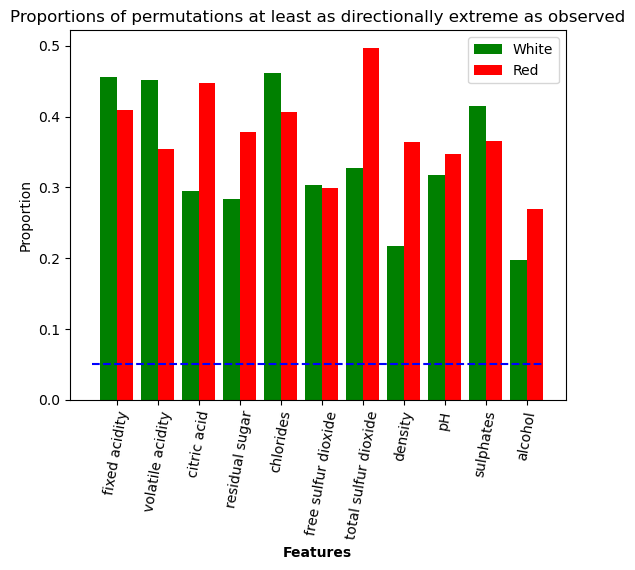

In [91]:
#plot the proportions of permutations exceeding the signed difference observations
features=original_corr_diff.index.tolist() #feature names
w=props['White'] #white proportions
r=props['Red'] #red proportions
width =0.4 #bar width
ind = np.arange(11) #index list
plt.bar(ind, w, width, color='green', alpha=1, label='White') #plot white proportions
plt.bar(ind+width, r, width, color='red', alpha=1, label='Red') #plot red proportions
plt.xticks(ind+width/2, features, rotation=80)  #set ticks between bar sets and use feature names
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Proportion')
plt.title('Proportions of permutations at least as directionally extreme as observed')
plt.legend()
#plot a line for the 5% proportion mark
plt.plot(np.arange(-0.4, 11.5, 1),[0.05]*12,linestyle='--',color='blue')
plt.show()

#### 12. From the bootstrap correlation differences, determine the z-scores and confidence levels of observed directional change not due to random chance.

##### Statistics of permuted correlation differences

In [92]:
#Create a function to evaluate means and standard deviation of the bootstrap correlation differences:
def stattable (rcorr,wcorr):
    #Initialise standard deviation (sigma) and mean (myu) lists
    rsigma=[]
    rmyu=[]
    wsigma=[]
    wmyu=[]
    #Loop over columns of rcorr:
    for i in rcorr.columns:
        rsigma.append(rcorr[i].std())
        rmyu.append(rcorr[i].mean())
    #Loop over columns of wcorr:
    for i in wcorr.columns:
        wsigma.append(wcorr[i].std())
        wmyu.append(wcorr[i].mean())
    df= pd.DataFrame({'Red (mean)' :rmyu,'Red (stdev)' :rsigma,'White (mean)' :wmyu,'White (stdev)' :wsigma})
    df.index = props.index #set row names to the feature names
    return df

In [93]:
#Generate table of means and standard deviations from the table of permutations
mystats = stattable(redcorr,whitecorr)
mystats

,Red (mean),Red (stdev),White (mean),White (stdev)
fixed acidity,0.001192,0.028182,-0.000559,0.016188
volatile acidity,-0.000148,0.024202,0.003556,0.016401
citric acid,0.000626,0.027345,-0.002693,0.012969
residual sugar,-0.005367,0.020771,-0.002346,0.014266
chlorides,-0.001132,0.022072,-0.000926,0.012548
free sulfur dioxide,-0.000134,0.025214,0.002652,0.015129
total sulfur dioxide,0.000777,0.026535,-0.004114,0.016015
density,-0.000718,0.027741,-0.001602,0.016049
pH,-0.000899,0.027800,-0.000320,0.015644
sulphates,-0.000921,0.031368,0.000808,0.016615


##### Z-scores and confidence levels 

In [94]:
# Evaluate the zscores and 1 tailed confidence level of the observed differences
def scores(myu,sigma,val):
    z = ((val-myu)/sigma)
    conf = 100 * (1- stats.norm.sf(z))
    return z.item(),conf.item()
# Evaluate the z scores and confidence levels using scores function and tabulate from the original 
# correlation differences table and the stats table
def scoretable(corrtable, stat_table):
    #initialise result dataframe
    result = pd.DataFrame(index=corrtable.index, columns=['Red z', 'Red Confidence', 'White z', 'White Confidence'])
    #loop over the features and the associated index
    for index, row in corrtable.iterrows():
        #retrieve values for each feature and wine colour
        red_myu = stat_table.loc[index, 'Red (mean)']
        red_sigma = stat_table.loc[index, 'Red (stdev)']
        white_myu = stat_table.loc[index, 'White (mean)']
        white_sigma = stat_table.loc[index, 'White (stdev)']
        #use "scores" function to generate z and confidence values
        red_z, red_confidence = scores(red_myu, red_sigma, row['Red'])
        white_z, white_confidence = scores(white_myu, white_sigma, row['White'])
        #Fill the values into each cell of the result dataframe
        result.at[index, 'Red z'] = red_z
        result.at[index, 'Red Confidence'] = red_confidence
        result.at[index, 'White z'] = white_z
        result.at[index, 'White Confidence'] = white_confidence
    return result

In [95]:
my_scores=scoretable(original_corr_diff,mystats)
my_scores.style.set_properties(**{'text-align': 'center'}) #center columns

,Red z,Red Confidence,White z,White Confidence
fixed acidity,0.232780,59.203406,-0.117620,45.318421
volatile acidity,-0.379085,35.231255,0.128005,55.092765
citric acid,-0.132274,44.738377,0.680961,75.205205
residual sugar,0.527335,70.101934,-0.574581,28.278734
chlorides,0.230566,59.117416,0.092243,53.674754
free sulfur dioxide,-0.538684,29.505246,0.708200,76.058950
total sulfur dioxide,-0.034869,48.609191,-0.454684,32.466846
density,-0.342710,36.590829,-0.799378,21.203550
pH,-0.400827,34.427358,0.478849,68.397705
sulphates,-0.330387,37.055392,0.221736,58.774040


In [96]:
#Create a function to tabulate if correlation changes are positive or negative and the confidence the 
#observed change has occured due to a trend and not random chance:
def resulttable ():
    rconf=my_scores['Red Confidence'] #red confidence values
    wconf=my_scores['White Confidence'] #white confidence values
    #Initialise lists for positive or negative labels
    wposneg=[]
    rposneg=[]
    #Loop over red values
    for i in range(len(my_scores['Red z'])):
        if my_scores['Red z'].iloc[i] < 0: #if z score for change <0
            rposneg.append('Negative')
        else:
            rposneg.append('Positive')
    #Loop over white values
    for i in range(len(my_scores['White z'])):
        if my_scores['White z'].iloc[i] < 0: #if z score for change <0
            wposneg.append('Negative')
        else:
            wposneg.append('Positive')            
    df= pd.DataFrame({'Red quality corr change': rposneg,'Red correlation confidence': rconf, 'White quality corr change': wposneg,'White correlation confidence': wconf})
    df.index = my_scores.index #set row names to the feature names
    return df


In [97]:
print("Results table of the nature of feature correlation with quality and it's confidence level")
resulttable().style.set_properties(**{'text-align': 'center'})

Results table of the nature of feature correlation with quality and it's confidence level


,Red quality corr change,Red correlation confidence,White quality corr change,White correlation confidence
fixed acidity,Positive,59.203406,Negative,45.318421
volatile acidity,Negative,35.231255,Positive,55.092765
citric acid,Negative,44.738377,Positive,75.205205
residual sugar,Positive,70.101934,Negative,28.278734
chlorides,Positive,59.117416,Positive,53.674754
free sulfur dioxide,Negative,29.505246,Positive,76.058950
total sulfur dioxide,Negative,48.609191,Negative,32.466846
density,Negative,36.590829,Negative,21.203550
pH,Negative,34.427358,Positive,68.397705
sulphates,Negative,37.055392,Positive,58.774040


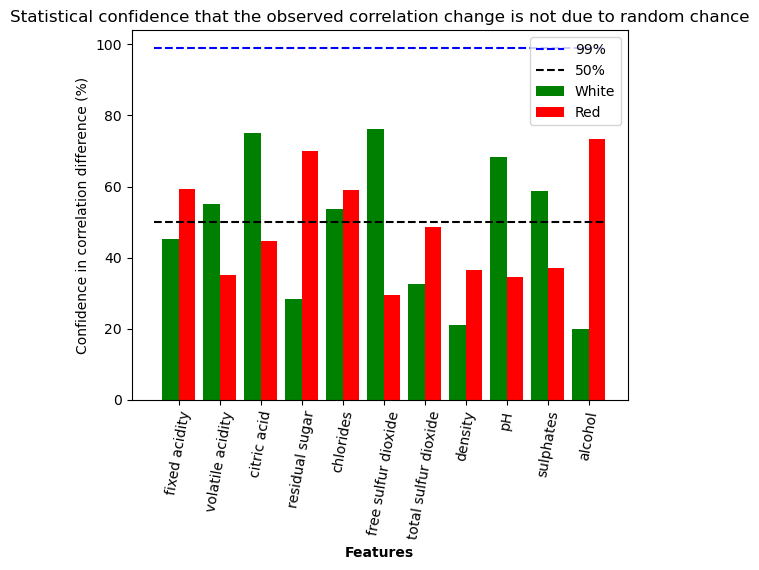

In [98]:
#Plot the confidence levels
features=original_corr_diff.index.tolist() #feature names
w=my_scores['White Confidence'] # white confidence values
r=my_scores['Red Confidence'] # red confidence values
width =0.4 #bar width
ind = np.arange(11) #index list
plt.bar(ind, w, width, color='green', alpha=1, label='White') #plot white levels
plt.bar(ind+width, r, width, color='red', alpha=1, label='Red') #plot red levels beside
plt.xticks(ind+width/2, features, rotation=80)  #put ticks between bar sets with feature names
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Confidence in correlation difference (%)')
plt.title('Statistical confidence that the observed correlation change is not due to random chance')
plt.plot(np.arange(-0.4, 11.5, 1),[99]*12,linestyle='--',color='blue',label='99%') #99% line
plt.plot(np.arange(-0.4, 11.5, 1),[50]*12,linestyle='--',color='black',label='50%') #50% line
plt.legend(loc='upper right')
plt.show()

## Conclusions, insights and business recommendations

The analysis provides some clear observations:
1. The data is wide ranging with contributing features missing
2. There are clear differences between red and white wine relationships
3. With the currently available data, there is no statistical significance to the magnitude of perceived correlation changes.
4. The highest evidence for change comes from Residual sugar and Alcohol content for red wine and Citric acid, Free SO$_2$ and pH for white wine all indicating an increase in correlation magnitude with quality.
5. Overall the relationship between wine features and perceived quality may have changed from 2009 to 2023 however increased observations across all sub_groups and feature inclusions such as wine styles or grape varieties are needed to reduce the distribution overlaps and more comprehensively show the magnitude of the changes with statistical significance.

From these observations the following recommendations can be made:
1. If using models based on 2009 data, the weights placed on features may need to be updated to reflect current tastes.
2. Current trends indicate that future models will be more significantly influenced by features with observed correlation increases such as chlorides which are increasingly negatively correlated for both red and white wines.
3. If your business focusses on optimising some or all of these features for quality determination, pay more attention to features with increasing correlations looking to maximise positively correlated features and minimise negatively correlated features
4. Conducting a longitudinal study would provide more definitive assessments on trends than an unregulated 2 set case study.
5. Including such features as wine style, sparkling or still, and grape blend is imperative for drawing conclusions specific to wines that a producer may wish to make as increasing the residual sugar in what is meant to be a dry red wine is unlikely to improve perceived quality even if the trend is for an increase in positive correlation for red wine in general.
6. More data in each subgroup is required for meaningful statistical analysis. Comparing the distribution of at times as little as 5 observations, makes generalisation errorsome